<a href="https://colab.research.google.com/github/eltonnillo/FIAP_TC5/blob/main/TC5_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [530]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

caminho_arquivo = '/content/drive/MyDrive/Pós FIAP/Fase 5/TC5/BASE DE DADOS PEDE 2024 - DATATHON.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [531]:
# Carregar todas as abas em um dicionário
dict_df = pd.read_excel(caminho_arquivo, sheet_name=None)

# Carregar as bases
df_2022 = dict_df['PEDE2022'].copy()
df_2023 = dict_df['PEDE2023'].copy()
df_2024 = dict_df['PEDE2024'].copy()

print("Dados carregados com sucesso!")

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Dados carregados com sucesso!


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [532]:
# Tamanho dos dataframes

print(f"Tamanho do dataframe de 2022: {df_2022.shape}")
print(f"Tamanho do dataframe de 2023: {df_2023.shape}")
print(f"Tamanho do dataframe de 2024: {df_2024.shape}")

Tamanho do dataframe de 2022: (860, 42)
Tamanho do dataframe de 2023: (1014, 48)
Tamanho do dataframe de 2024: (1156, 50)


# Colunas de interesse

Dados Aluno

1. RA (identificador de aluno)
2. Gênero
3. Fase
4. Defasagem
5. Pedra
6. Adequação do nível (IAN)
7. Desempenho acadêmico (IDA)
8. Engajamento nas atividades (IEG)
9. Autoavaliação (IAA)
10. Aspectos psicossociais (IPS)
11. Ponto de virada (IPV)
12. INDE
13. Aspectos psicopedagógicos (IPP) (Falta em 2022)












In [533]:
# Colunas de df_2022

df_2022.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    int64  
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    int64  
 5   Idade 22               860 non-null    int64  
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    int64  
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    float64
 13  Cg                     860 non-null    int64  
 14  Cf                     860 non-null    int64  
 15  Ct    

In [534]:
df_2022_tratado = df_2022.copy()

# Selecionar colunas
df_2022_tratado = df_2022_tratado[['RA', 'Gênero', 'Fase', 'Defas', 'Pedra 22', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE 22']]

# Padronizar nomes de colunas
df_2022_tratado = df_2022_tratado.rename(columns={
    'Gênero': 'Genero',
    'Pedra 22': 'Pedra',
    'Defas': 'Defasagem',
    'INDE 22': 'INDE'
})

df_2022_tratado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RA         860 non-null    object 
 1   Genero     860 non-null    object 
 2   Fase       860 non-null    int64  
 3   Defasagem  860 non-null    int64  
 4   Pedra      860 non-null    object 
 5   IAN        860 non-null    float64
 6   IDA        860 non-null    float64
 7   IEG        860 non-null    float64
 8   IAA        860 non-null    float64
 9   IPS        860 non-null    float64
 10  IPV        860 non-null    float64
 11  INDE       860 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 80.8+ KB


In [535]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1014 non-null   object 
 1   Fase                   1014 non-null   object 
 2   INDE 2023              931 non-null    float64
 3   Pedra 2023             931 non-null    object 
 4   Turma                  1014 non-null   object 
 5   Nome Anonimizado       1014 non-null   object 
 6   Data de Nasc           1014 non-null   object 
 7   Idade                  1014 non-null   object 
 8   Gênero                 1014 non-null   object 
 9   Ano ingresso           1014 non-null   int64  
 10  Instituição de ensino  1014 non-null   object 
 11  Pedra 20               240 non-null    object 
 12  Pedra 21               335 non-null    object 
 13  Pedra 22               600 non-null    object 
 14  Pedra 23               0 non-null      float64
 15  INDE

In [536]:
df_2023_tratado = df_2023.copy()

# Selecionar colunas
df_2023_tratado = df_2023_tratado[['RA', 'Gênero', 'Fase', 'Defasagem', 'Pedra 2023', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE 2023', 'IPP']]

# Padronizar nomes de colunas
df_2023_tratado = df_2023_tratado.rename(columns={
    'Gênero': 'Genero',
    'Pedra 2023': 'Pedra',
    'INDE 2023': 'INDE'
})

df_2023_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RA         1014 non-null   object 
 1   Genero     1014 non-null   object 
 2   Fase       1014 non-null   object 
 3   Defasagem  1014 non-null   int64  
 4   Pedra      931 non-null    object 
 5   IAN        1014 non-null   float64
 6   IDA        937 non-null    float64
 7   IEG        938 non-null    float64
 8   IAA        951 non-null    float64
 9   IPS        945 non-null    float64
 10  IPV        938 non-null    float64
 11  INDE       931 non-null    float64
 12  IPP        938 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 103.1+ KB


In [537]:
# Limpar nulos de df_2023_tratado

df_2023_tratado = df_2023_tratado.dropna()

df_2023_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 937
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RA         931 non-null    object 
 1   Genero     931 non-null    object 
 2   Fase       931 non-null    object 
 3   Defasagem  931 non-null    int64  
 4   Pedra      931 non-null    object 
 5   IAN        931 non-null    float64
 6   IDA        931 non-null    float64
 7   IEG        931 non-null    float64
 8   IAA        931 non-null    float64
 9   IPS        931 non-null    float64
 10  IPV        931 non-null    float64
 11  INDE       931 non-null    float64
 12  IPP        931 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.8+ KB


In [538]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RA                     1156 non-null   object        
 1   Fase                   1156 non-null   object        
 2   INDE 2024              1092 non-null   object        
 3   Pedra 2024             1092 non-null   object        
 4   Turma                  1156 non-null   object        
 5   Nome Anonimizado       1156 non-null   object        
 6   Data de Nasc           1156 non-null   datetime64[ns]
 7   Idade                  1156 non-null   int64         
 8   Gênero                 1156 non-null   object        
 9   Ano ingresso           1156 non-null   int64         
 10  Instituição de ensino  1155 non-null   object        
 11  Pedra 20               191 non-null    object        
 12  Pedra 21               264 non-null    object        
 13  Ped

In [539]:
df_2024_tratado = df_2024.copy()

# Selecionar colunas
df_2024_tratado = df_2024_tratado[['RA', 'Gênero', 'Fase', 'Defasagem', 'Pedra 2024', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE 2024', 'IPP']]

# Padronizar nomes de colunas
df_2024_tratado = df_2024_tratado.rename(columns={
    'Gênero': 'Genero',
    'Pedra 2024': 'Pedra',
    'INDE 2024': 'INDE'
})

df_2024_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RA         1156 non-null   object 
 1   Genero     1156 non-null   object 
 2   Fase       1156 non-null   object 
 3   Defasagem  1156 non-null   int64  
 4   Pedra      1092 non-null   object 
 5   IAN        1156 non-null   float64
 6   IDA        1055 non-null   float64
 7   IEG        1156 non-null   float64
 8   IAA        1054 non-null   float64
 9   IPS        1054 non-null   float64
 10  IPV        1054 non-null   float64
 11  INDE       1092 non-null   object 
 12  IPP        1054 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 117.5+ KB


In [540]:
# Limpar nulos de df_2024_tratado

df_2024_tratado = df_2024_tratado.dropna()

df_2024_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 0 to 1053
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RA         1054 non-null   object 
 1   Genero     1054 non-null   object 
 2   Fase       1054 non-null   object 
 3   Defasagem  1054 non-null   int64  
 4   Pedra      1054 non-null   object 
 5   IAN        1054 non-null   float64
 6   IDA        1054 non-null   float64
 7   IEG        1054 non-null   float64
 8   IAA        1054 non-null   float64
 9   IPS        1054 non-null   float64
 10  IPV        1054 non-null   float64
 11  INDE       1054 non-null   object 
 12  IPP        1054 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 115.3+ KB


In [541]:
# Listar as colunas

print(df_2022_tratado.columns)
print(df_2023_tratado.columns)
print(df_2024_tratado.columns)

Index(['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG',
       'IAA', 'IPS', 'IPV', 'INDE'],
      dtype='object')
Index(['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG',
       'IAA', 'IPS', 'IPV', 'INDE', 'IPP'],
      dtype='object')
Index(['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG',
       'IAA', 'IPS', 'IPV', 'INDE', 'IPP'],
      dtype='object')


In [542]:
import numpy as np

# Criando a coluna IPP em 2022 com valores zero para igualar a estrutura
df_2022_tratado['IPP'] = np.nan

# Criando coluna AnoRef para identificar o ano de referência dos registros de cada base
df_2022_tratado['AnoRef'] = 2022
df_2023_tratado['AnoRef'] = 2023
df_2024_tratado['AnoRef'] = 2024

# Reordenar as colunas para que fiquem exatamente na mesma ordem dos outros anos
colunas_padrao = df_2024_tratado.columns.tolist()
df_2022_tratado = df_2022_tratado[colunas_padrao]
df_2023_tratado = df_2023_tratado[colunas_padrao]

In [543]:
# Listar as colunas

print(df_2022_tratado.columns)
print(df_2023_tratado.columns)
print(df_2024_tratado.columns)

Index(['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG',
       'IAA', 'IPS', 'IPV', 'INDE', 'IPP', 'AnoRef'],
      dtype='object')
Index(['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG',
       'IAA', 'IPS', 'IPV', 'INDE', 'IPP', 'AnoRef'],
      dtype='object')
Index(['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG',
       'IAA', 'IPS', 'IPV', 'INDE', 'IPP', 'AnoRef'],
      dtype='object')


In [544]:
# Concatenar os dataframes
df_combinado = pd.concat([df_2022_tratado, df_2023_tratado, df_2024_tratado], ignore_index=True)

print("Dataframe combinado criado com sucesso!")
print("\nPrimeiras 5 linhas do df_combinado:")
display(df_combinado.head())

print("\nInformações do df_combinado:")
df_combinado.info()

Dataframe combinado criado com sucesso!

Primeiras 5 linhas do df_combinado:


RA  Genero Fase  Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0  RA-1  Menina    7         -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1  RA-2  Menina    7          0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2  RA-3  Menina    7          0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3  RA-4  Menino    7          0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4  RA-5  Menina    7          0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE  IPP  AnoRef  
0  5.783  NaN    2022  
1  7.055  NaN    2022  
2  6.591  NaN    2022  
3  5.951  NaN    2022  
4  7.427  NaN    2022


Informações do df_combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RA         2845 non-null   object 
 1   Genero     2845 non-null   object 
 2   Fase       2845 non-null   object 
 3   Defasagem  2845 non-null   int64  
 4   Pedra      2845 non-null   object 
 5   IAN        2845 non-null   float64
 6   IDA        2845 non-null   float64
 7   IEG        2845 non-null   float64
 8   IAA        2845 non-null   float64
 9   IPS        2845 non-null   float64
 10  IPV        2845 non-null   float64
 11  INDE       2845 non-null   object 
 12  IPP        1985 non-null   float64
 13  AnoRef     2845 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 311.3+ KB


In [545]:
#Análise da coluna RA

print(f"Tipo de dado da coluna 'RA': {df_combinado['RA'].dtype}")
print(f"Valores nulos na coluna 'RA': {df_combinado['RA'].isnull().sum()}")
print(f"Número de valores únicos na coluna 'RA': {df_combinado['RA'].nunique()}")
print("Alguns valores únicos da coluna 'RA':")
display(df_combinado['RA'].unique()[:10]) # Exibe os primeiros 10 valores únicos

Tipo de dado da coluna 'RA': object
Valores nulos na coluna 'RA': 0
Número de valores únicos na coluna 'RA': 1586
Alguns valores únicos da coluna 'RA':


array(['RA-1', 'RA-2', 'RA-3', 'RA-4', 'RA-5', 'RA-6', 'RA-7', 'RA-8',
       'RA-9', 'RA-10'], dtype=object)

In [546]:
# Removendo texto de RA e convertendo em inteiro

df_combinado['RA'] = df_combinado['RA'].str.replace('RA-', '').astype(int)
print("Prefixo 'RA-' removido e coluna 'RA' convertida para inteiro.")
print(f"Novo tipo de dado da coluna 'RA': {df_combinado['RA'].dtype}")
print("Primeiras 5 linhas do df_combinado com a coluna 'RA' atualizada:")
display(df_combinado.head())

Prefixo 'RA-' removido e coluna 'RA' convertida para inteiro.
Novo tipo de dado da coluna 'RA': int64
Primeiras 5 linhas do df_combinado com a coluna 'RA' atualizada:


RA  Genero Fase  Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1  Menina    7         -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2  Menina    7          0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3  Menina    7          0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Menino    7          0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5  Menina    7          0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE  IPP  AnoRef  
0  5.783  NaN    2022  
1  7.055  NaN    2022  
2  6.591  NaN    2022  
3  5.951  NaN    2022  
4  7.427  NaN    2022

In [547]:
# Analisando a coluna Genero

print(f"Tipo de dado da coluna 'Genero': {df_combinado['Genero'].dtype}")
print(f"Valores nulos na coluna 'Genero': {df_combinado['Genero'].isnull().sum()}")
print(f"Número de valores únicos na coluna 'Genero': {df_combinado['Genero'].nunique()}")
print("Valores únicos na coluna 'Genero':")
display(df_combinado['Genero'].unique())

Tipo de dado da coluna 'Genero': object
Valores nulos na coluna 'Genero': 0
Número de valores únicos na coluna 'Genero': 4
Valores únicos na coluna 'Genero':


array(['Menina', 'Menino', 'Feminino', 'Masculino'], dtype=object)

In [548]:
# Padronizar os valores da coluna 'Genero'
df_combinado['Genero'] = df_combinado['Genero'].replace({
    'Menina': 'Feminino',
    'Menino': 'Masculino'
})

# Converter a coluna 'Genero' para o tipo categórico
df_combinado['Genero'] = df_combinado['Genero'].astype('category')

print("Coluna 'Genero' padronizada e convertida para tipo categórico com sucesso!")
print("\nNovos valores únicos na coluna 'Genero':")
display(df_combinado['Genero'].unique())
print(f"Novo tipo de dado da coluna 'Genero': {df_combinado['Genero'].dtype}")

Coluna 'Genero' padronizada e convertida para tipo categórico com sucesso!

Novos valores únicos na coluna 'Genero':


['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']

Novo tipo de dado da coluna 'Genero': category


In [549]:
# Analisando a coluna Fase

print(f"Tipo de dado da coluna 'Fase': {df_combinado['Fase'].dtype}")
print(f"Valores nulos na coluna 'Fase': {df_combinado['Fase'].isnull().sum()}")
print(f"Número de valores únicos na coluna 'Fase': {df_combinado['Fase'].nunique()}")
print("Valores únicos na coluna 'Fase':")
display(df_combinado['Fase'].unique())

Tipo de dado da coluna 'Fase': object
Valores nulos na coluna 'Fase': 0
Número de valores únicos na coluna 'Fase': 81
Valores únicos na coluna 'Fase':


array([7, 6, 5, 4, 3, 2, 1, 0, 'ALFA', 'FASE 1', 'FASE 2', 'FASE 3',
       'FASE 4', 'FASE 5', 'FASE 6', 'FASE 7', '1A', '1B', '1C', '1D',
       '1E', '1G', '1H', '1J', '1K', '1L', '1M', '1N', '1P', '1R', '2A',
       '2B', '2C', '2D', '2G', '2H', '2I', '2K', '2L', '2M', '2N', '2P',
       '2R', '2U', '3A', '3B', '3C', '3D', '3F', '3G', '3H', '3I', '3K',
       '3L', '3M', '3N', '3P', '3R', '3U', '4A', '4B', '4C', '4F', '4H',
       '4L', '4M', '4N', '4R', '5A', '5B', '5C', '5D', '5F', '5G', '5L',
       '5M', '5N', '6A', '6L', '7A', '7E'], dtype=object)

### Tratamento de Fase

De acordo com a documentação, as fases vão de ALFA a Fase 8. Aqui ALFA será considerado 0 e será feita a limpeza de dados não numéricos. As fases 1A, 1B... e casos semelhantes serão agrupados apenas pelo número.

In [550]:
# 1. Mapear 'ALFA' e suas variações para 0
df_combinado['Fase'] = df_combinado['Fase'].replace({
    'ALFA': '0', 'ALFA A': '0', 'ALFA B': '0', 'ALFA C': '0',
    'Alfa': '0', 'Alfa A': '0', 'Alfa B': '0', 'Alfa C': '0' # Adicionado variações com 'Alfa' minúsculo
})

# 2. Extrair a parte numérica para casos como '1A', '2B', etc.
# Usar regex para encontrar um ou mais dígitos no início da string.
#df_combinado['Fase'] = df_combinado['Fase'].astype(str).str.extract(r'^(\d+)', expand=False)
df_combinado['Fase'] = df_combinado['Fase'].astype(str).str.extract(r'(\d+)', expand=False)

# 3. Converter a coluna 'Fase' para numérico, tratando erros para NaN
df_combinado['Fase'] = pd.to_numeric(df_combinado['Fase'], errors='coerce')

# Preencher NaNs restantes com 0 (assumindo que NaNs restantes são fases desconhecidas ou não aplicáveis)
df_combinado['Fase'] = df_combinado['Fase'].fillna(0)

# 4. Converter a coluna 'Fase' para o tipo categórico (já que as fases são categorias discretas)
df_combinado['Fase'] = df_combinado['Fase'].astype('category')

print("Coluna 'Fase' tratada e convertida para tipo categórico com sucesso!")
print(f"\nNovo tipo de dado da coluna 'Fase': {df_combinado['Fase'].dtype}")
print(f"Valores nulos na coluna 'Fase': {df_combinado['Fase'].isnull().sum()}")
display(df_combinado['Fase'].unique())

Coluna 'Fase' tratada e convertida para tipo categórico com sucesso!

Novo tipo de dado da coluna 'Fase': category
Valores nulos na coluna 'Fase': 0


[7, 6, 5, 4, 3, 2, 1, 0]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [551]:
# Analisando a coluna Defasagem

print(f"Tipo de dado da coluna 'Defasagem': {df_combinado['Defasagem'].dtype}")
print(f"Valores nulos na coluna 'Defasagem': {df_combinado['Defasagem'].isnull().sum()}")
print(f"Número de valores únicos na coluna 'Defasagem': {df_combinado['Defasagem'].nunique()}")
print("Valores únicos na coluna 'Defasagem':")
display(df_combinado['Defasagem'].unique())

Tipo de dado da coluna 'Defasagem': int64
Valores nulos na coluna 'Defasagem': 0
Número de valores únicos na coluna 'Defasagem': 9
Valores únicos na coluna 'Defasagem':


array([-1,  0, -2, -3,  2,  1, -4, -5,  3])

In [552]:
# Converter a coluna 'Defasagem' para o tipo categórico
df_combinado['Defasagem'] = df_combinado['Defasagem'].astype('category')

print("Coluna 'Defasagem' convertida para tipo categórico com sucesso!")
print(f"Novo tipo de dado da coluna 'Defasagem': {df_combinado['Defasagem'].dtype}")
print("\nValores únicos na coluna 'Defasagem':")
display(df_combinado['Defasagem'].unique())

Coluna 'Defasagem' convertida para tipo categórico com sucesso!
Novo tipo de dado da coluna 'Defasagem': category

Valores únicos na coluna 'Defasagem':


[-1, 0, -2, -3, 2, 1, -4, -5, 3]
Categories (9, int64): [-5, -4, -3, -2, ..., 0, 1, 2, 3]

In [553]:
#Analisando a coluna Pedra

print(f"Tipo de dado da coluna 'Pedra': {df_combinado['Pedra'].dtype}")
print(f"Valores nulos na coluna 'Pedra': {df_combinado['Pedra'].isnull().sum()}")
print(f"Número de valores únicos na coluna 'Pedra': {df_combinado['Pedra'].nunique()}")
print("Valores únicos na coluna 'Pedra':")
display(df_combinado['Pedra'].unique())

Tipo de dado da coluna 'Pedra': object
Valores nulos na coluna 'Pedra': 0
Número de valores únicos na coluna 'Pedra': 5
Valores únicos na coluna 'Pedra':


array(['Quartzo', 'Ametista', 'Ágata', 'Topázio', 'Agata'], dtype=object)

In [554]:
# 1. Padronizar o nome 'Agata' para 'Ágata'
df_combinado['Pedra'] = df_combinado['Pedra'].replace('Agata', 'Ágata')

# 2. Definir a ordem de grandeza das categorias conforme documentação
ordem_pedras = ['Quartzo', 'Ágata', 'Ametista', 'Topázio']

# 3. Converter a coluna 'Pedra' para o tipo categórico ordenado
df_combinado['Pedra'] = pd.Categorical(df_combinado['Pedra'], categories=ordem_pedras, ordered=True)

print("Coluna 'Pedra' padronizada e convertida para tipo categórico ordenado com sucesso!")
print("\nNovos valores únicos na coluna 'Pedra' (ordenados):")
display(df_combinado['Pedra'].unique())
print(f"Novo tipo de dado da coluna 'Pedra': {df_combinado['Pedra'].dtype}")

Coluna 'Pedra' padronizada e convertida para tipo categórico ordenado com sucesso!

Novos valores únicos na coluna 'Pedra' (ordenados):


['Quartzo', 'Ametista', 'Ágata', 'Topázio']
Categories (4, object): ['Quartzo' < 'Ágata' < 'Ametista' < 'Topázio']

Novo tipo de dado da coluna 'Pedra': category


In [555]:
# Verificando as colunas numéricas

print("Resumo estatístico do df_combinado:")
display(df_combinado.describe())

Resumo estatístico do df_combinado:


RA          IAN          IDA          IEG          IAA  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean    707.295958     7.010545     6.376784     8.229802     7.926578   
std     421.094490     2.510504     1.957528     1.568487     2.617534   
min       1.000000     2.500000     0.000000     0.000000     0.000000   
25%     369.000000     5.000000     5.100000     7.500000     7.900000   
50%     672.000000     5.000000     6.666667     8.654244     8.751000   
75%    1009.000000    10.000000     7.833333     9.400000     9.500000   
max    1632.000000    10.000000    10.000000    10.000000    10.002000   

               IPS          IPV          IPP       AnoRef  
count  2845.000000  2845.000000  1985.000000  2845.000000  
mean      6.297762     7.545910     7.555974  2023.068190  
std       1.784413     1.085439     0.938275     0.817523  
min       2.500000     2.500000     2.500000  2022.000000  
25%       5.020000     6.966000     7.083333  2022.000000  
50%       7.500000     7.583000     7.500000  2023.000000  
75%       7.510000     8.255000     8.125000  2024.000000  
max      10.000000    10.010000    10.000000  2024.000000

In [556]:
# INDE não apareceu como numérico. Analisando INDE.

print(f"Tipo de dado da coluna 'INDE': {df_combinado['INDE'].dtype}")
print(f"Valores nulos na coluna 'INDE': {df_combinado['INDE'].isnull().sum()}")
print("Valores únicos na coluna 'INDE':")
display(df_combinado['INDE'].unique())

Tipo de dado da coluna 'INDE': object
Valores nulos na coluna 'INDE': 0
Valores únicos na coluna 'INDE':


array([5.783, 7.055, 6.591, ..., 7.449366666666667, 8.243183333333334,
       7.7887], dtype=object)

In [557]:
# Convertendo INDE para numérico

df_combinado['INDE'] = pd.to_numeric(df_combinado['INDE'], errors='coerce')

print("Coluna 'INDE' convertida para numérica com sucesso!")
print(f"Novo tipo de dado da coluna 'INDE': {df_combinado['INDE'].dtype}")
print(f"Valores nulos na coluna 'INDE' após conversão: {df_combinado['INDE'].isnull().sum()}")


Coluna 'INDE' convertida para numérica com sucesso!
Novo tipo de dado da coluna 'INDE': float64
Valores nulos na coluna 'INDE' após conversão: 0


In [558]:
print("Resumo estatístico do df_combinado após conversão de 'INDE':")
display(df_combinado.describe())

Resumo estatístico do df_combinado após conversão de 'INDE':


RA          IAN          IDA          IEG          IAA  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean    707.295958     7.010545     6.376784     8.229802     7.926578   
std     421.094490     2.510504     1.957528     1.568487     2.617534   
min       1.000000     2.500000     0.000000     0.000000     0.000000   
25%     369.000000     5.000000     5.100000     7.500000     7.900000   
50%     672.000000     5.000000     6.666667     8.654244     8.751000   
75%    1009.000000    10.000000     7.833333     9.400000     9.500000   
max    1632.000000    10.000000    10.000000    10.000000    10.002000   

               IPS          IPV         INDE          IPP       AnoRef  
count  2845.000000  2845.000000  2845.000000  1985.000000  2845.000000  
mean      6.297762     7.545910     7.269915     7.555974  2023.068190  
std       1.784413     1.085439     0.991767     0.938275     0.817523  
min       2.500000     2.500000     3.032000     2.500000  2022.000000  
25%       5.020000     6.966000     6.675200     7.083333  2022.000000  
50%       7.500000     7.583000     7.388267     7.500000  2023.000000  
75%       7.510000     8.255000     7.986867     8.125000  2024.000000  
max      10.000000    10.010000     9.531325    10.000000  2024.000000

# Task
The user wants to modify the KNN imputation process to include the 'Fase' column. This involves updating the column selection for `df_temp_imputacao` and ensuring 'Fase' is treated as an integer type for the `KNNImputer`.

To achieve this, I will perform the following actions:

1.  **Update `df_temp_imputacao` selection (Cell `f1cf4d21`)**: Add 'Fase' to the list of columns selected from `df_combinado`.
2.  **Convert 'Fase' to integer (Cell `25f4a055`)**: Explicitly convert the 'Fase' column to `int` type within `df_imputacao_knn` before applying the `KNNImputer`.
3.  **Verify subsequent steps**: Confirm that the scaling and imputation steps (cells `b572ea44` and `da912e37`) will automatically include and process the 'Fase' column now that it is a numerical feature in `df_imputacao_knn`.

This will ensure that 'Fase' is properly incorporated into the KNN imputation alongside other relevant features.

## Atualizar Seleção de Colunas

### Subtask:
Modificar a célula `f1cf4d21` para incluir a coluna 'Fase' na seleção de colunas para o `df_temp_imputacao`.


**Reasoning**:
The subtask requires modifying the code cell `f1cf4d21` to include the 'Fase' column in the selection for `df_temp_imputacao`. I will update the code to select 'Fase' along with other specified columns.



In [559]:
df_temp_imputacao = df_combinado[['RA', 'Genero', 'Fase', 'Defasagem', 'Pedra', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE', 'IPP', 'AnoRef']].copy()

print("DataFrame temporário para imputação criado com sucesso.")
print("Primeiras 5 linhas do df_temp_imputacao:")
display(df_temp_imputacao.head())

DataFrame temporário para imputação criado com sucesso.
Primeiras 5 linhas do df_temp_imputacao:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE  IPP  AnoRef  
0  5.783  NaN    2022  
1  7.055  NaN    2022  
2  6.591  NaN    2022  
3  5.951  NaN    2022  
4  7.427  NaN    2022

**Reasoning**:
The previous step updated `df_temp_imputacao` to include the 'Fase' column. Now, I need to ensure that 'Fase' is treated as an integer type for KNN imputation. I will modify the existing code in cell `25f4a055` to explicitly convert the 'Fase' column to `int` and then copy `df_temp_imputacao` to `df_imputacao_knn`.



In [560]:
df_imputacao_knn = df_temp_imputacao.copy()

# Convert the 'Fase' column to integer type
df_imputacao_knn['Fase'] = df_imputacao_knn['Fase'].astype(int)

# 2. Converter a coluna 'Defasagem' para tipo int
df_imputacao_knn['Defasagem'] = df_imputacao_knn['Defasagem'].astype(int)

# 3. Converter a coluna 'Pedra' para representação numérica ordinal usando .cat.codes
df_imputacao_knn['Pedra'] = df_imputacao_knn['Pedra'].cat.codes

# 4. Aplicar One-Hot Encoding na coluna 'Genero'
df_imputacao_knn = pd.get_dummies(df_imputacao_knn, columns=['Genero'], prefix='Genero', dtype=int)

print("DataFrame para imputação KNN preparado com sucesso!")
print("Primeiras 5 linhas do df_imputacao_knn:")
display(df_imputacao_knn.head())
print("Informações do df_imputacao_knn:")
df_imputacao_knn.info()

DataFrame para imputação KNN preparado com sucesso!
Primeiras 5 linhas do df_imputacao_knn:


RA  Fase  Defasagem  Pedra   IAN  IDA  IEG  IAA  IPS    IPV   INDE  IPP  \
0   1     7         -1      0   5.0  4.0  4.1  8.3  5.6  7.278  5.783  NaN   
1   2     7          0      2  10.0  6.8  5.2  8.8  6.3  6.778  7.055  NaN   
2   3     7          0      1  10.0  5.6  7.9  0.0  5.6  7.556  6.591  NaN   
3   4     7          0      0  10.0  5.0  4.5  8.8  5.6  5.278  5.951  NaN   
4   5     7          0      2  10.0  5.2  8.6  7.9  5.6  7.389  7.427  NaN   

   AnoRef  Genero_Feminino  Genero_Masculino  
0    2022                1                 0  
1    2022                1                 0  
2    2022                1                 0  
3    2022                0                 1  
4    2022                1                 0

Informações do df_imputacao_knn:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RA                2845 non-null   int64  
 1   Fase              2845 non-null   int64  
 2   Defasagem         2845 non-null   int64  
 3   Pedra             2845 non-null   int8   
 4   IAN               2845 non-null   float64
 5   IDA               2845 non-null   float64
 6   IEG               2845 non-null   float64
 7   IAA               2845 non-null   float64
 8   IPS               2845 non-null   float64
 9   IPV               2845 non-null   float64
 10  INDE              2845 non-null   float64
 11  IPP               1985 non-null   float64
 12  AnoRef            2845 non-null   int64  
 13  Genero_Feminino   2845 non-null   int64  
 14  Genero_Masculino  2845 non-null   int64  
dtypes: float64(8), int64(6), int8(1)
memory usage: 314.1 KB


**Reasoning**:
Now that the DataFrame is prepared with numerical representations for categorical features, including 'Fase' as an integer, I will scale the numerical features using `StandardScaler`. This is crucial for KNNImputer to work effectively, as it relies on distance calculations. The 'RA' column will be excluded as it is an identifier and not a feature for imputation.



In [561]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas numéricas para escalonamento (excluindo 'RA')
columns_to_scale = df_imputacao_knn.columns.drop('RA').tolist()

# Separar os dados a serem escalados (excluindo 'RA')
X_to_scale = df_imputacao_knn[columns_to_scale].copy()

# Instanciar o StandardScaler
scaler = StandardScaler()

# Aplicar o escalonamento
X_scaled = scaler.fit_transform(X_to_scale)

# Criar um DataFrame com os dados escalados para facilitar a visualização e manipulação
df_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale, index=df_imputacao_knn.index)

# Adicionar a coluna 'RA' de volta ao df_scaled para manter o identificador
df_scaled['RA'] = df_imputacao_knn['RA']

print("Features numéricas escaladas com sucesso!")
print("Primeiras 5 linhas do DataFrame escalado:")
display(df_scaled.head())
print("Resumo estatístico do DataFrame escalado (IPP original):")
display(df_scaled[['IPP']].describe())

Features numéricas escaladas com sucesso!
Primeiras 5 linhas do DataFrame escalado:


Fase  Defasagem     Pedra       IAN       IDA       IEG       IAA  \
0  2.631348  -0.353687 -1.877608 -0.800994 -1.214389 -2.633447  0.142687   
1  2.631348   0.823202  0.248479  1.190988  0.216237 -1.932011  0.333740   
2  2.631348   0.823202 -0.814564  1.190988 -0.396888 -0.210304 -3.028794   
3  2.631348   0.823202 -1.877608  1.190988 -0.703451 -2.378379  0.333740   
4  2.631348   0.823202  0.248479  1.190988 -0.601264  0.236064 -0.010156   

        IPS       IPV      INDE  IPP    AnoRef  Genero_Feminino  \
0 -0.391100 -0.246866 -1.499522  NaN -1.306847         0.934314   
1  0.001254 -0.707590 -0.216737  NaN -1.306847         0.934314   
2 -0.391100  0.009297 -0.684671  NaN -1.306847         0.934314   
3 -0.391100 -2.089763 -1.330098  NaN -1.306847        -1.070304   
4 -0.391100 -0.144585  0.158417  NaN -1.306847         0.934314   

   Genero_Masculino  RA  
0         -0.934314   1  
1         -0.934314   2  
2         -0.934314   3  
3          1.070304   4  
4         -0.934314   5

Resumo estatístico do DataFrame escalado (IPP original):


IPP
count  1.985000e+03
mean   9.020492e-16
std    1.000252e+00
min   -5.389941e+00
25%   -5.038609e-01
50%   -5.967182e-02
75%    6.066118e-01
max    2.605463e+00

**Reasoning**:
I will apply `KNNImputer` to the scaled DataFrame to fill the missing values in the 'IPP' column, as KNN imputation is effective for numerical data, especially when features are scaled. After imputation, I will inverse transform the data to revert to the original scale and then reintroduce the 'RA' column.



In [562]:
from sklearn.impute import KNNImputer

# Identificar colunas para imputação (excluindo 'RA' novamente para o imputer)
columns_for_imputation = df_scaled.columns.drop('RA').tolist()
X_for_imputation = df_scaled[columns_for_imputation].copy()

# Instanciar o KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Aplicar o KNNImputer
X_imputed_scaled = imputer.fit_transform(X_for_imputation)

# Criar um DataFrame com os dados imputados e escalados
df_imputed_scaled = pd.DataFrame(X_imputed_scaled, columns=columns_for_imputation, index=df_scaled.index)

# Desfazer o escalonamento dos dados imputados
X_imputed_unscaled = scaler.inverse_transform(df_imputed_scaled)

# Criar um DataFrame com os dados imputados e sem escalonamento
df_imputed_unscaled = pd.DataFrame(X_imputed_unscaled, columns=columns_for_imputation, index=df_scaled.index)

# Adicionar a coluna 'RA' de volta ao DataFrame imputado
df_imputed_unscaled['RA'] = df_imputacao_knn['RA']

print("Imputação KNN concluída e dados desescalados com sucesso!")
print("Primeiras 5 linhas do DataFrame com IPP imputado:")
display(df_imputed_unscaled.head())
print("Resumo estatístico da coluna 'IPP' após imputação:")
display(df_imputed_unscaled['IPP'].describe())

Imputação KNN concluída e dados desescalados com sucesso!
Primeiras 5 linhas do DataFrame com IPP imputado:


Fase  Defasagem  Pedra   IAN  IDA  IEG           IAA  IPS    IPV   INDE  \
0   7.0       -1.0    0.0   5.0  4.0  4.1  8.300000e+00  5.6  7.278  5.783   
1   7.0        0.0    2.0  10.0  6.8  5.2  8.800000e+00  6.3  6.778  7.055   
2   7.0        0.0    1.0  10.0  5.6  7.9 -8.881784e-16  5.6  7.556  6.591   
3   7.0        0.0    0.0  10.0  5.0  4.5  8.800000e+00  5.6  5.278  5.951   
4   7.0        0.0    2.0  10.0  5.2  8.6  7.900000e+00  5.6  7.389  7.427   

        IPP  AnoRef  Genero_Feminino  Genero_Masculino  RA  
0  7.437500  2022.0              1.0               0.0   1  
1  7.443750  2022.0              1.0               0.0   2  
2  7.193750  2022.0              1.0               0.0   3  
3  6.316667  2022.0              0.0               1.0   4  
4  7.500000  2022.0              1.0               0.0   5

Resumo estatístico da coluna 'IPP' após imputação:


count    2845.000000
mean        7.460739
std         0.879658
min         2.500000
25%         6.916667
50%         7.500000
75%         8.041667
max        10.000000
Name: IPP, dtype: float64

**Reasoning**:
The imputed 'IPP' values are now in `df_imputed_unscaled`. I will extract the 'IPP' column from `df_imputed_unscaled` and update the 'IPP' column in the original `df_combinado` DataFrame using 'RA' as the key.



In [563]:
df_combinado = df_combinado.merge(df_imputed_unscaled[['RA', 'IPP']], on='RA', how='left', suffixes=('', '_imputed'))
df_combinado['IPP'] = df_combinado['IPP_imputed']
df_combinado.drop(columns=['IPP_imputed'], inplace=True)

print("Coluna 'IPP' imputada reintegrada ao df_combinado com sucesso!")
print("Primeiras 5 linhas do df_combinado com IPP atualizado:")
display(df_combinado.head())

Coluna 'IPP' imputada reintegrada ao df_combinado com sucesso!
Primeiras 5 linhas do df_combinado com IPP atualizado:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE       IPP  AnoRef  
0  5.783  7.437500    2022  
1  7.055  7.443750    2022  
2  6.591  7.193750    2022  
3  5.951  6.316667    2022  
4  7.427  7.500000    2022

**Reasoning**:
Now that the 'IPP' column has been imputed and reintegrated into `df_combinado`, I need to verify that there are no more null values in this column and display its descriptive statistics to confirm the successful imputation. This aligns with the 'Verificar a Imputação da Coluna 'IPP'' instruction in the task.



In [564]:
print("Verificando a coluna 'IPP' após a imputação:")
print(f"Valores nulos na coluna 'IPP': {df_combinado['IPP'].isnull().sum()}")
print("Resumo estatístico da coluna 'IPP':")
display(df_combinado['IPP'].describe())

print("Verificando as primeiras linhas do DataFrame combinado com IPP atualizado:")
display(df_combinado.head())

Verificando a coluna 'IPP' após a imputação:
Valores nulos na coluna 'IPP': 0
Resumo estatístico da coluna 'IPP':


count    6231.000000
mean        7.479308
std         0.888949
min         2.500000
25%         6.937500
50%         7.500000
75%         8.125000
max        10.000000
Name: IPP, dtype: float64

Verificando as primeiras linhas do DataFrame combinado com IPP atualizado:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE       IPP  AnoRef  
0  5.783  7.437500    2022  
1  7.055  7.443750    2022  
2  6.591  7.193750    2022  
3  5.951  6.316667    2022  
4  7.427  7.500000    2022

## Análise de Dados

### Perguntas propostas:


1. Adequação do nível (IAN): Qual é o perfil geral de defasagem dos alunos (IAN) e como ele evolui ao longo do ano? (Ex.: quantos alunos estão moderadamente ou severamente defasados?)

2. Desempenho acadêmico (IDA): O desempenho acadêmico médio (IDA) está melhorando, estagnado ou caindo ao longo das fases e anos?

3. Engajamento nas atividades (IEG): O grau de engajamento dos alunos (IEG) tem relação direta com seus indicadores de desempenho (IDA) e do ponto de virada (IPV)?

4. Autoavaliação (IAA): As percepções dos alunos sobre si mesmos (IAA) são coerentes com seu desempenho real (IDA) e engajamento (IEG)?

5. Aspectos psicossociais (IPS): Há padrões psicossociais (IPS) que antecedem quedas de desempenho acadêmico ou de engajamento?

6. Aspectos psicopedagógicos (IPP): As avaliações psicopedagógicas (IPP) confirmam ou contradizem a defasagem identificada pelo IAN?

7. Ponto de virada (IPV): Quais comportamentos - acadêmicos, emocionais ou de engajamento - mais influenciam o IPV ao longo do tempo?

8. Multidimensionalidade dos indicadores: Quais combinações de indicadores (IDA + IEG + IPS + IPP) elevam mais a nota global do aluno (INDE)?

9. Previsão de risco com Machine Learning: Quais padrões nos indicadores permitem identificar alunos em risco antes de queda no desempenho ou aumento da defasagem? Construa um modelo preditivo que mostre uma probabilidade do aluno ou aluna entrar em risco de defasagem.

10. Efetividade do programa: Os indicadores mostram melhora consistente ao longo do ciclo nas diferentes fases (Quartzo, Ágata, Ametista e Topázio), confirmando o impacto real do programa?

11. Insights e criatividade: Você pode adicionar mais insights e pontos de vista não abordados nas perguntas, utilize a criatividade e a análise dos dados para trazer sugestões para a Passos Mágicos.


In [565]:
df_analise = df_combinado.copy()

print("Cópia do df_combinado criada com sucesso como df_analise!")
print("Primeiras 5 linhas de df_analise:")
display(df_analise.head())

Cópia do df_combinado criada com sucesso como df_analise!
Primeiras 5 linhas de df_analise:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE       IPP  AnoRef  
0  5.783  7.437500    2022  
1  7.055  7.443750    2022  
2  6.591  7.193750    2022  
3  5.951  6.316667    2022  
4  7.427  7.500000    2022

# Respostas:

### 1. Adequação do nível (IAN): Qual é o perfil geral de defasagem dos alunos (IAN) e como ele evolui ao longo do ano? (Ex.: quantos alunos estão moderadamente ou severamente defasados?)


In [566]:
# valores distintos de IAN

print("Valores distintos de IAN:")
display(df_analise['IAN'].unique())

Valores distintos de IAN:


array([ 5. , 10. ,  2.5])

In [567]:
# Criar um dicionário de mapeamento para a coluna 'IAN_grupo'
ian_dict = {
    2.5: 'Defasagem Severa',
    5.0: 'Defasagem Moderada',
    10.0: 'Em Fase'
}

# Criar a nova coluna 'IAN_grupo' aplicando o dicionário
df_analise['IAN_grupo'] = df_analise['IAN'].map(ian_dict)

print("Coluna 'IAN_grupo' criada com sucesso usando o dicionário de mapeamento!")
print("Primeiras 5 linhas do df_analise com a nova coluna 'IAN_grupo':")
display(df_analise.head())

print("\nContagem de valores na nova coluna 'IAN_grupo':")
display(df_analise['IAN_grupo'].value_counts())

Coluna 'IAN_grupo' criada com sucesso usando o dicionário de mapeamento!
Primeiras 5 linhas do df_analise com a nova coluna 'IAN_grupo':


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE       IPP  AnoRef           IAN_grupo  
0  5.783  7.437500    2022  Defasagem Moderada  
1  7.055  7.443750    2022             Em Fase  
2  6.591  7.193750    2022             Em Fase  
3  5.951  6.316667    2022             Em Fase  
4  7.427  7.500000    2022             Em Fase


Contagem de valores na nova coluna 'IAN_grupo':


IAN_grupo
Defasagem Moderada    3499
Em Fase               2655
Defasagem Severa        77
Name: count, dtype: int64

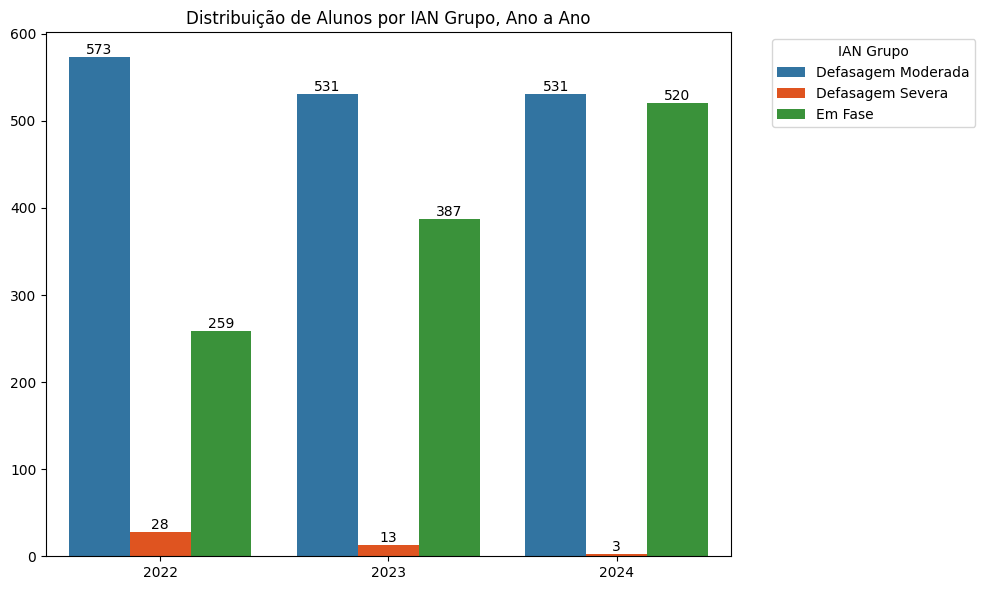

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de alunos únicos por AnoRef e IAN_grupo
ian_grupo_por_ano = df_analise.groupby(['AnoRef', 'IAN_grupo'], observed=False)['RA'].nunique().reset_index()
ian_grupo_por_ano.rename(columns={'RA': 'Total_Alunos'}, inplace=True)

# Definir uma paleta de cores personalizada
# Assumindo que queremos Defasagem Severa em vermelho, e as outras em tons de azul/verde para contraste
custom_palette = {
    'Defasagem Severa': '#FF4500',  # Red-Orange para destaque
    'Defasagem Moderada': '#1f77b4', # Azul
    'Em Fase': '#2ca02c'            # Verde
}

# Criar o gráfico de barras lado a lado
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AnoRef', y='Total_Alunos', hue='IAN_grupo', data=ian_grupo_por_ano, dodge=True, palette=custom_palette) # Aplicando a paleta personalizada

# Adicionar rótulos de dados nas barras para cada grupo
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Distribuição de Alunos por IAN Grupo, Ano a Ano')
plt.xlabel('') # Excluir título do eixo X
plt.ylabel('') # Excluir título do eixo Y
plt.legend(title='IAN Grupo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False) # Excluir linhas de grade
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Como se observa no gráfico, o perfil de defasagem dado pelo IAN tem boa evolução, já que a quantidade de alunos EM FASE está numa crescente ano a ano e a quantidade de alunos com DEFASAGEM SEVERA se movimenta no sentido contrário, ou seja, apresenta queda, chegando a apenas 3 alunos em 2024.

O desafio aqui é o grupo de DEFASAGEM MODERADA, que permanece estável e pode ter mais foco nos anos seguintes.


### 2. Desempenho acadêmico (IDA): O desempenho acadêmico médio (IDA) está melhorando, estagnado ou caindo ao longo das fases e anos?

In [569]:
# Valor médio do IDA ano a ano
media_ida_por_ano = df_analise.groupby('AnoRef')['IDA'].mean().reset_index()

print("Tabela com o valor médio do IDA ano a ano:")
display(media_ida_por_ano)

Tabela com o valor médio do IDA ano a ano:


AnoRef       IDA
0    2022  6.353387
1    2023  6.702157
2    2024  6.317700

A média geral do desempenho acadêmico (IDA) teve um aumento em 2023, mas acabou tendo uma piora em 2024, fechando em 6,31, valor menor que o de 2022.

In [570]:
# IDA por fase em 2024
ida_2024_por_fase = media_ida_por_fase_ano[media_ida_por_fase_ano['AnoRef'] == 2024]

print("Tabela com o valor médio do IDA por fase para o ano de 2024:")
display(ida_2024_por_fase)

Tabela com o valor médio do IDA por fase para o ano de 2024:


AnoRef Fase       IDA
16    2024    0  7.200000
17    2024    1  6.678184
18    2024    2  6.382538
19    2024    3  5.423642
20    2024    4  5.981812
21    2024    5  6.639130
22    2024    6  7.415064
23    2024    7  6.187057

Observando os dados de 2024, temos que ALFA (0) apresenta a melhor média.

As fases 3 e 4 são pontos de atenção, com média abaixo de 6.

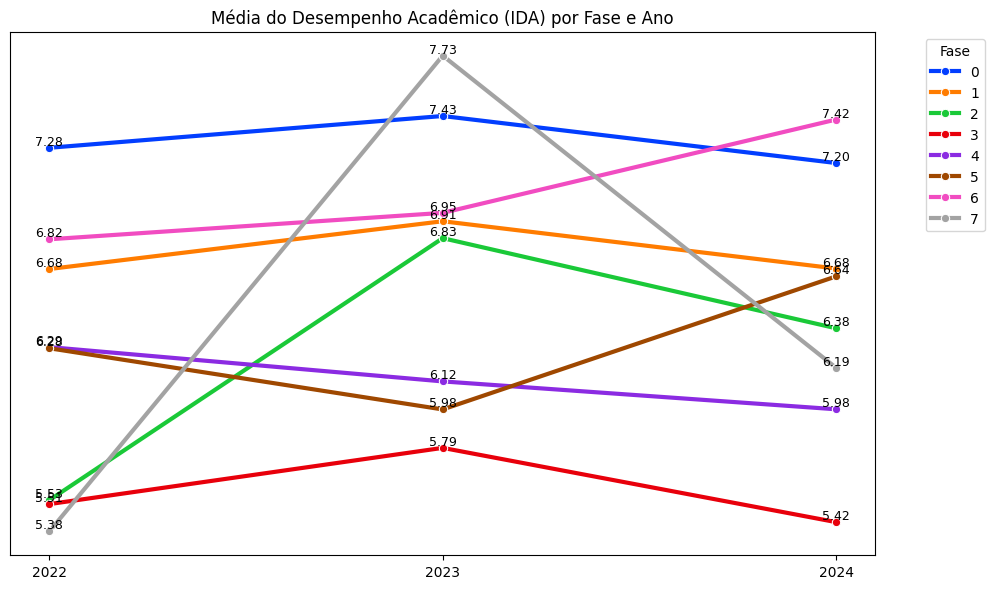

In [571]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular o valor médio do IDA por fase e ano
media_ida_por_fase_ano = df_analise.groupby(['AnoRef', 'Fase'], observed=False)['IDA'].mean().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6)) # Diminui o tamanho do gráfico
ax = sns.lineplot(x='AnoRef', y='IDA', hue='Fase', data=media_ida_por_fase_ano, marker='o', palette='bright', linewidth=3)

# Adicionar rótulos de dados nos pontos
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    # Verificar se há dados na linha antes de tentar acessar elementos
    if len(x_data) > 0 and len(y_data) > 0:
        # Rótulos de dados numéricos em cada ponto
        for x_val, y_val in zip(x_data, y_data):
            ax.text(x_val, y_val, f'{y_val:.2f}', ha='center', va='bottom', fontsize=9)

        # Nome da série ao lado da última linha (Removido para mostrar a legenda)
        # x_last = x_data[-1]
        # y_last = y_data[-1]
        # label_text = line.get_label() # Obtém o nome da fase diretamente
        #
        # try:
        #     fase_num = float(label_text)
        #     ax.text(x_last + 0.05, y_last, f'Fase {int(fase_num)}', va='center', ha='left', fontsize=10, color=line.get_color())
        # except ValueError:
        #     pass


plt.title('Média do Desempenho Acadêmico (IDA) por Fase e Ano')
plt.xlabel('') # Excluir título do eixo X
plt.ylabel('') # Excluir título do eixo Y
ax.set_yticks([]) # Remover os ticks e valores do eixo Y
# ax.legend().remove() # Mostrar a legenda (Removido o .remove())
plt.legend(title='Fase', bbox_to_anchor=(1.05, 1), loc='upper left') # Adicionar a legenda novamente
plt.grid(False) # Excluir linhas de grade
plt.xticks(media_ida_por_fase_ano['AnoRef'].unique()) # Garante que todos os anos sejam mostrados como ticks
plt.tight_layout()
plt.show()

Como se depreende do gráfico acima, as piores fases em 2024 (3 e 4) apresentaram queda e se confirmam como pontos de atenção.

As fases 0, 1,  embora tenham apresentado leve queda em 2024, mostram-se estagnadas se considerarmos os dados desde 2022.

As fases 2, 5, e 6 aprensentam melhora.

A fase 7 apresenta melhora geral, embora tenha havido forte oscilação e queda em 2024.

### 3. Engajamento nas atividades (IEG): O grau de engajamento dos alunos (IEG) tem relação direta com seus indicadores de desempenho (IDA) e do ponto de virada (IPV)?

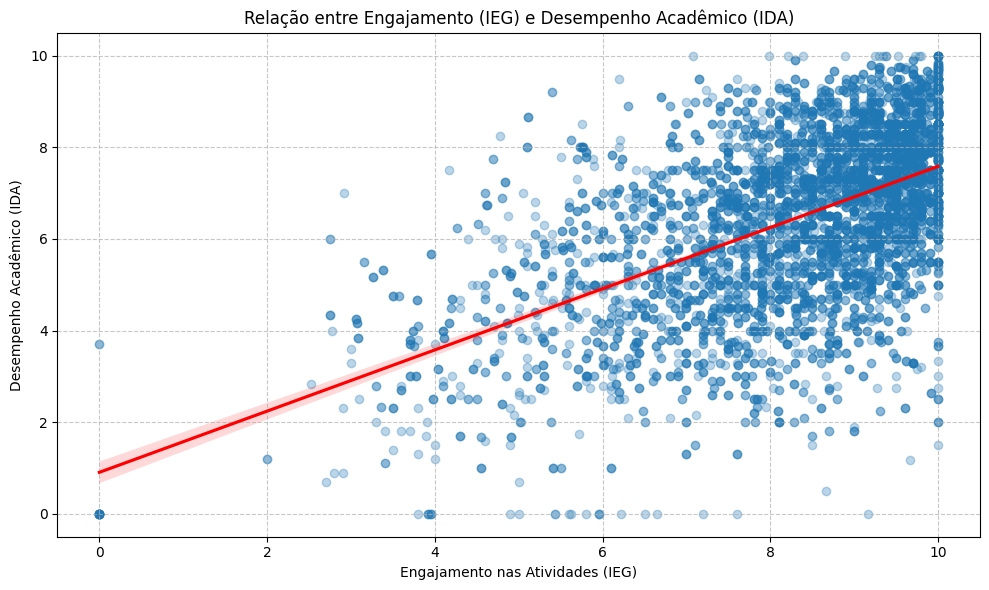


Coeficiente de Correlação de Pearson entre IEG e IDA: 0.53


In [572]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='IEG', y='IDA', data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relação entre Engajamento (IEG) e Desempenho Acadêmico (IDA)')
plt.xlabel('Engajamento nas Atividades (IEG)')
plt.ylabel('Desempenho Acadêmico (IDA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson
correlation = df_analise['IEG'].corr(df_analise['IDA'])
print(f"\nCoeficiente de Correlação de Pearson entre IEG e IDA: {correlation:.2f}")

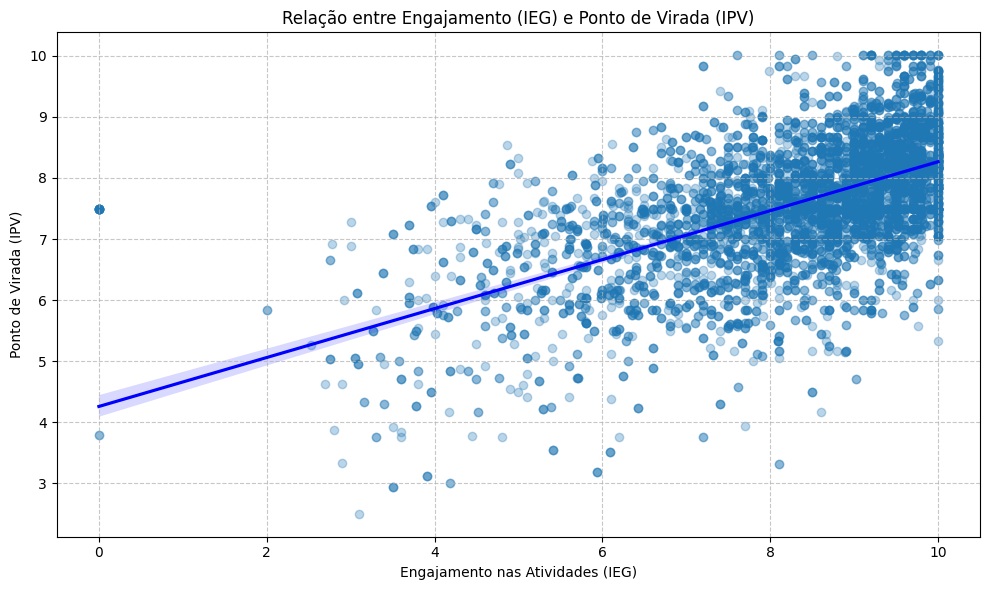


Coeficiente de Correlação de Pearson entre IEG e IPV: 0.56


In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='IEG', y='IPV', data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.title('Relação entre Engajamento (IEG) e Ponto de Virada (IPV)')
plt.xlabel('Engajamento nas Atividades (IEG)')
plt.ylabel('Ponto de Virada (IPV)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson
correlation_ipv = df_analise['IEG'].corr(df_analise['IPV'])
print(f"\nCoeficiente de Correlação de Pearson entre IEG e IPV: {correlation_ipv:.2f}")

Para responder à pergunta sobre a existência de relação direta entre o IEG e os indicadores IDA e IPV dos alunos, empregamos o uso de gráficos de dispersão.

Ambos os gráficos mostram linhas de regressão bem marcadas, com concentração dos pontos ao seu redor, indicando uma correlação positiva.

O indicador de Pearson calculado de 0.53 para o IDA e 0.56 para o IPV, sinalizam esta correlação como moderada.

Assim sendo, há relação entre o Engajamento nas Atividades e os indicadores de Desempenho Acadêmico e Ponto de Virada.

### 4. Autoavaliação (IAA): As percepções dos alunos sobre si mesmos (IAA) são coerentes com seu desempenho real (IDA) e engajamento (IEG)?

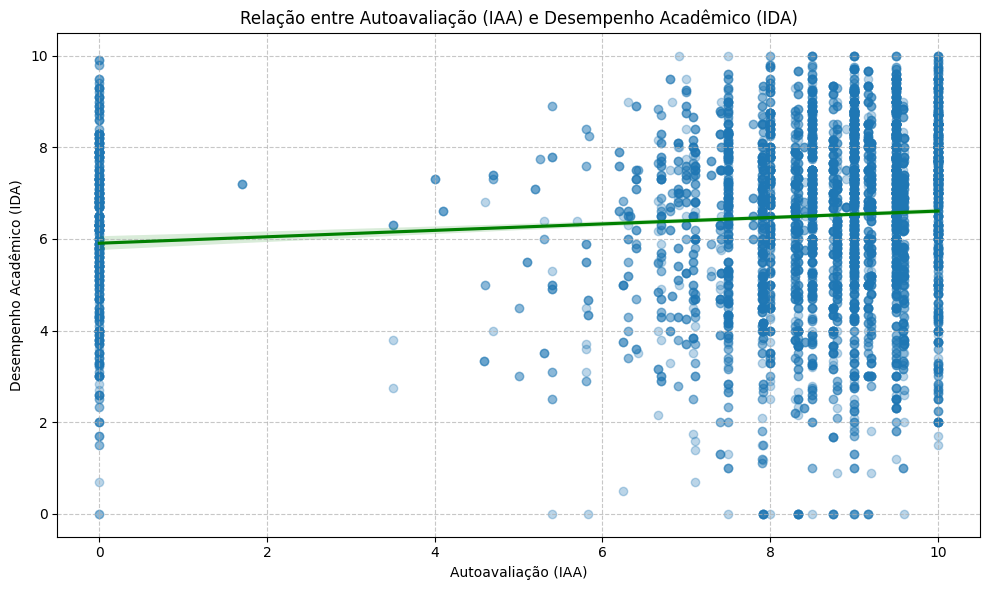


Coeficiente de Correlação de Pearson entre IAA e IDA: 0.10


In [574]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com linha de regressão para IAA vs IDA
plt.figure(figsize=(10, 6))
sns.regplot(x='IAA', y='IDA', data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Relação entre Autoavaliação (IAA) e Desempenho Acadêmico (IDA)')
plt.xlabel('Autoavaliação (IAA)')
plt.ylabel('Desempenho Acadêmico (IDA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson entre IAA e IDA
correlation_iaa_ida = df_analise['IAA'].corr(df_analise['IDA'])
print(f"\nCoeficiente de Correlação de Pearson entre IAA e IDA: {correlation_iaa_ida:.2f}")

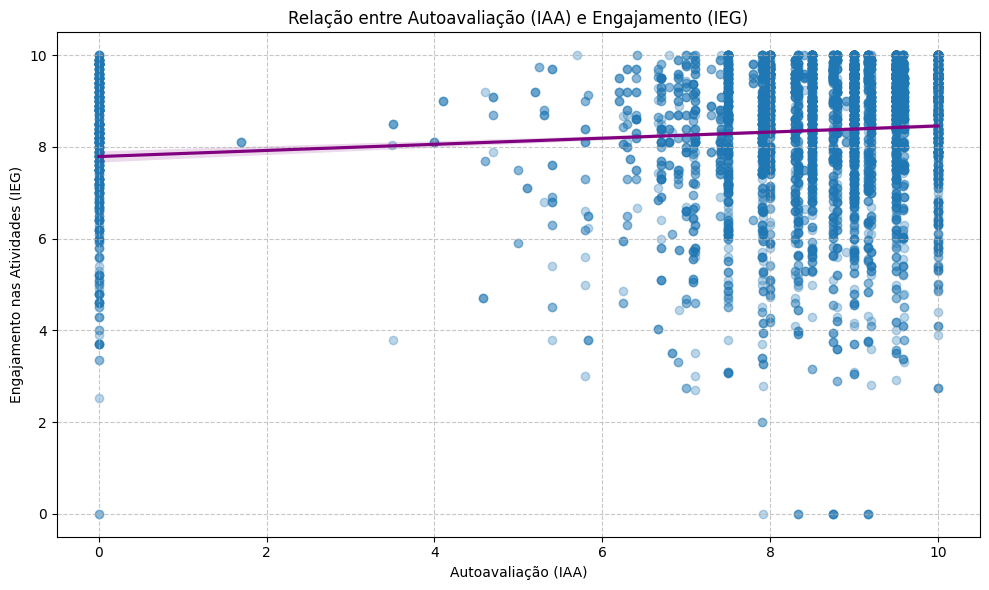


Coeficiente de Correlação de Pearson entre IAA e IEG: 0.12


In [575]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com linha de regressão para IAA vs IEG
plt.figure(figsize=(10, 6))
sns.regplot(x='IAA', y='IEG', data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
plt.title('Relação entre Autoavaliação (IAA) e Engajamento (IEG)')
plt.xlabel('Autoavaliação (IAA)')
plt.ylabel('Engajamento nas Atividades (IEG)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson entre IAA e IEG
correlation_iaa_ieg = df_analise['IAA'].corr(df_analise['IEG'])
print(f"\nCoeficiente de Correlação de Pearson entre IAA e IEG: {correlation_iaa_ieg:.2f}")

Mais uma vez foram empregados gráficos de dispersão para analisar a correlação entre a percepção dos alunos sobre si mesmos (IAA) e os seus níveis de engajamento (IEG) e de desempenho acadêmico (IDA).

Em ambos os casos, há uma correlação positiva muito fraca, nota-se que os pontos estão dispersos e a linha de correlação está praticamente plana. Os coeficientes de correlação de Pearson são de 0.10 e 0.12.

Isto indica que a percepção dos alunos não é muito coerente com o seu engajamento e desempenho real.

### 5. Aspectos psicossociais (IPS): Há padrões psicossociais (IPS) que antecedem quedas de desempenho acadêmico ou de engajamento?

In [576]:
print("Estatísticas descritivas para a coluna 'IPS':")
display(df_analise['IPS'].describe())

Estatísticas descritivas para a coluna 'IPS':


count    6231.000000
mean        6.224240
std         1.812764
min         2.500000
25%         5.000000
50%         7.500000
75%         7.510000
max        10.000000
Name: IPS, dtype: float64

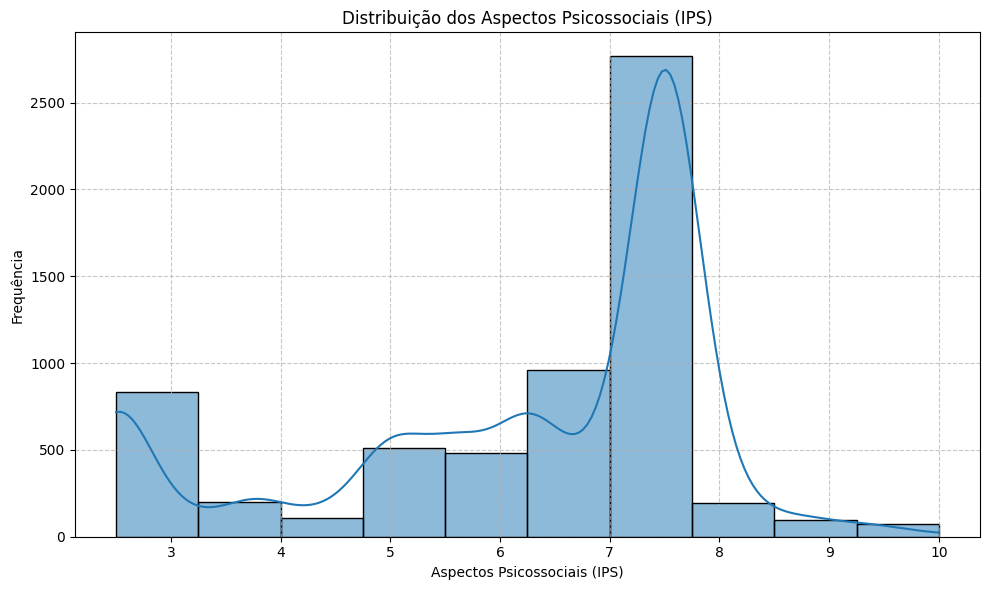

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_analise['IPS'], bins=10, kde=True)
plt.title('Distribuição dos Aspectos Psicossociais (IPS)')
plt.xlabel('Aspectos Psicossociais (IPS)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O histograma de IPS indica uma concentração de alunos com valor próximo de 7, que indica uma boa adequação psicológica e social, embora haja uma cauda com valores menores e que merecem atenção.



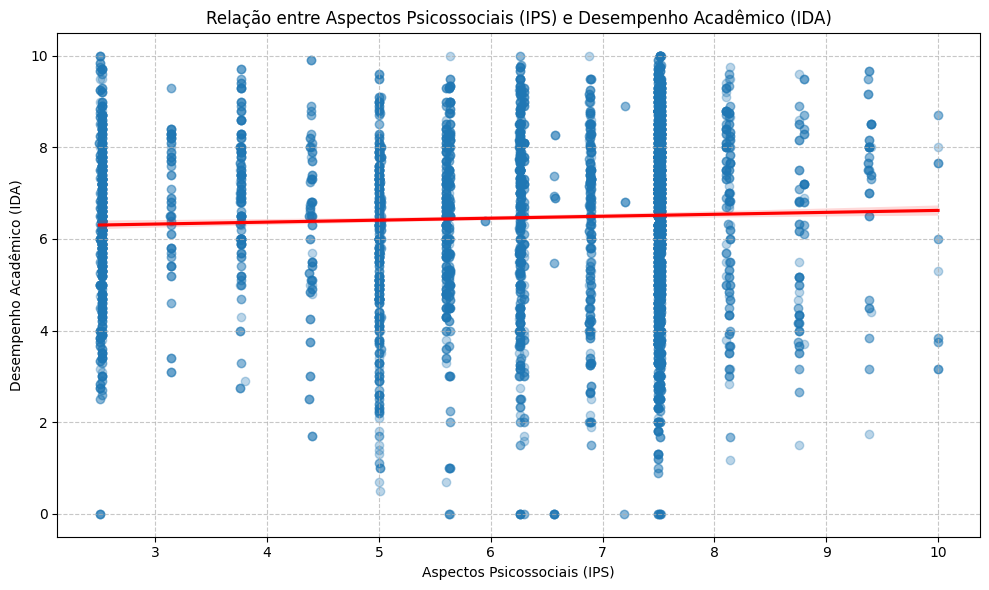


Coeficiente de Correlação de Pearson entre IPS e IDA: 0.04


In [578]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com linha de regressão para IPS vs IDA
plt.figure(figsize=(10, 6))
sns.regplot(x='IPS', y='IDA', data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relação entre Aspectos Psicossociais (IPS) e Desempenho Acadêmico (IDA)')
plt.xlabel('Aspectos Psicossociais (IPS)')
plt.ylabel('Desempenho Acadêmico (IDA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson entre IPS e IDA
correlation_ips_ida = df_analise['IPS'].corr(df_analise['IDA'])
print(f"\nCoeficiente de Correlação de Pearson entre IPS e IDA: {correlation_ips_ida:.2f}")

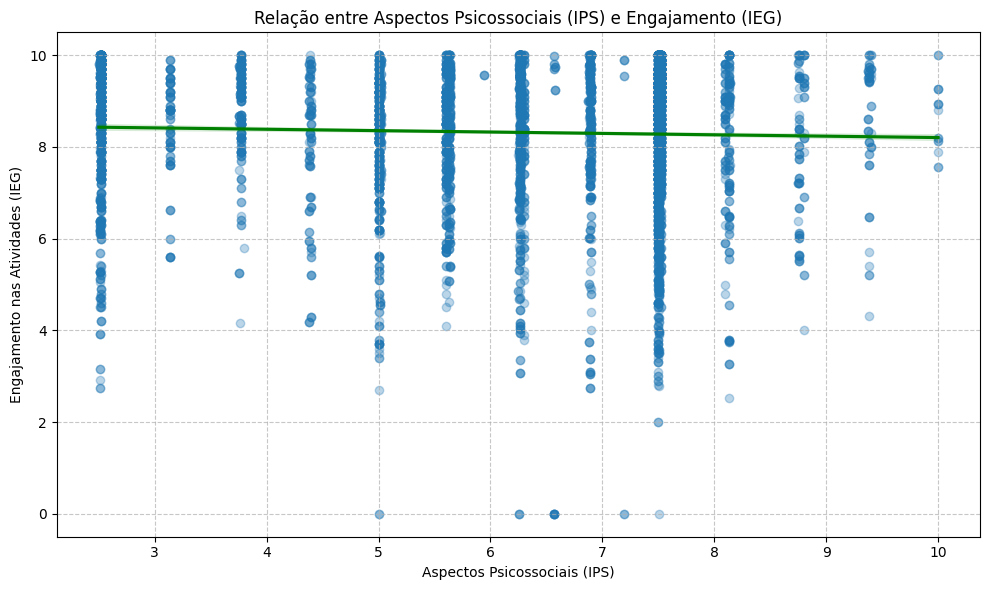


Coeficiente de Correlação de Pearson entre IPS e IEG: -0.04


In [579]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com linha de regressão para IPS vs IEG
plt.figure(figsize=(10, 6))
sns.regplot(x='IPS', y='IEG', data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Relação entre Aspectos Psicossociais (IPS) e Engajamento (IEG)')
plt.xlabel('Aspectos Psicossociais (IPS)')
plt.ylabel('Engajamento nas Atividades (IEG)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson entre IPS e IEG
correlation_ips_ieg = df_analise['IPS'].corr(df_analise['IEG'])
print(f"\nCoeficiente de Correlação de Pearson entre IPS e IEG: {correlation_ips_ieg:.2f}")

Foram utilizados gráficos de dispersão para avaliar uma eventual correlação direta do IPS com o IDA e o IEG, mas as linhas quase horizontais, a dispersão dos pontos e os indicadores de Pearson próximos de 0 indicam baixíssima ou nenhuma correlação.



In [580]:
df_temporal = df_analise.copy()

# Sort by RA and AnoRef to ensure correct lagging
df_temporal = df_temporal.sort_values(by=['RA', 'AnoRef'])

# Create lagged columns for IDA and IEG (IDA_next_year, IEG_next_year)
df_temporal['IDA_proximo_ano'] = df_temporal.groupby('RA')['IDA'].shift(-1)
df_temporal['IEG_proximo_ano'] = df_temporal.groupby('RA')['IEG'].shift(-1)

print("DataFrame preparado para análise temporal com colunas lagged.")
print("Primeiras 10 linhas do df_temporal com colunas lagged:")
display(df_temporal.head(10))
print("Verificando a quantidade de valores nulos nas novas colunas:")
print(df_temporal[['IDA_proximo_ano', 'IEG_proximo_ano']].isnull().sum())

DataFrame preparado para análise temporal com colunas lagged.
Primeiras 10 linhas do df_temporal com colunas lagged:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   
5   6   Feminino    7        -1   Quartzo   5.0  3.3  4.5  7.9  7.5  7.222   
6   7  Masculino    7        -1     Ágata   5.0  7.6  8.4  0.0  7.5  7.667   
7   8   Feminino    7        -1   Quartzo   5.0  1.6  4.6  7.1  6.3  6.278   
8   9   Feminino    7        -1   Topázio   5.0  6.7  9.5  8.8  7.5  9.500   
9  10   Feminino    7        -1   Quartzo   5.0  4.1  5.2  8.3  5.0  7.056   

    INDE       IPP  AnoRef           IAN_grupo  IDA_proximo_ano  \
0  5.783  7.437500    2022  Defasagem Moderada              NaN   
1  7.055  7.443750    2022             Em Fase              NaN   
2  6.591  7.193750    2022             Em Fase              NaN   
3  5.951  6.316667    2022             Em Fase              NaN   
4  7.427  7.500000    2022             Em Fase              NaN   
5  5.848  7.531250    2022  Defasagem Moderada              NaN   
6  6.818  7.479167    2022  Defasagem Moderada              NaN   
7  4.786  7.418750    2022  Defasagem Moderada              NaN   
8  8.109  7.712500    2022  Defasagem Moderada              NaN   
9  5.784  7.281250    2022  Defasagem Moderada              NaN   

   IEG_proximo_ano  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN

Verificando a quantidade de valores nulos nas novas colunas:
IDA_proximo_ano    1586
IEG_proximo_ano    1586
dtype: int64


**Reasoning**:
The next step is to calculate the change in 'IDA' and 'IEG' from one year to the next using the newly created lagged columns. I will create new columns `IDA_diff` and `IEG_diff` in `df_temporal` to represent these changes.



In [581]:
df_temporal['IDA_diff'] = df_temporal['IDA_proximo_ano'] - df_temporal['IDA']
df_temporal['IEG_diff'] = df_temporal['IEG_proximo_ano'] - df_temporal['IEG']

print("Colunas 'IDA_diff' e 'IEG_diff' criadas com sucesso.")
print("Primeiras 10 linhas do df_temporal com as novas colunas:")
display(df_temporal.head(10))
print("Verificando a quantidade de valores nulos nas novas colunas de diferença:")
print(df_temporal[['IDA_diff', 'IEG_diff']].isnull().sum())

Colunas 'IDA_diff' e 'IEG_diff' criadas com sucesso.
Primeiras 10 linhas do df_temporal com as novas colunas:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   
5   6   Feminino    7        -1   Quartzo   5.0  3.3  4.5  7.9  7.5  7.222   
6   7  Masculino    7        -1     Ágata   5.0  7.6  8.4  0.0  7.5  7.667   
7   8   Feminino    7        -1   Quartzo   5.0  1.6  4.6  7.1  6.3  6.278   
8   9   Feminino    7        -1   Topázio   5.0  6.7  9.5  8.8  7.5  9.500   
9  10   Feminino    7        -1   Quartzo   5.0  4.1  5.2  8.3  5.0  7.056   

    INDE       IPP  AnoRef           IAN_grupo  IDA_proximo_ano  \
0  5.783  7.437500    2022  Defasagem Moderada              NaN   
1  7.055  7.443750    2022             Em Fase              NaN   
2  6.591  7.193750    2022             Em Fase              NaN   
3  5.951  6.316667    2022             Em Fase              NaN   
4  7.427  7.500000    2022             Em Fase              NaN   
5  5.848  7.531250    2022  Defasagem Moderada              NaN   
6  6.818  7.479167    2022  Defasagem Moderada              NaN   
7  4.786  7.418750    2022  Defasagem Moderada              NaN   
8  8.109  7.712500    2022  Defasagem Moderada              NaN   
9  5.784  7.281250    2022  Defasagem Moderada              NaN   

   IEG_proximo_ano  IDA_diff  IEG_diff  
0              NaN       NaN       NaN  
1              NaN       NaN       NaN  
2              NaN       NaN       NaN  
3              NaN       NaN       NaN  
4              NaN       NaN       NaN  
5              NaN       NaN       NaN  
6              NaN       NaN       NaN  
7              NaN       NaN       NaN  
8              NaN       NaN       NaN  
9              NaN       NaN       NaN

Verificando a quantidade de valores nulos nas novas colunas de diferença:
IDA_diff    1586
IEG_diff    1586
dtype: int64


**Reasoning**:
Now that 'IDA_diff' and 'IEG_diff' have been calculated, I will analyze the relationship between 'IPS' and drops in 'IDA' or 'IEG'. I will define 'drops' as negative differences and then visualize the distribution of 'IPS' for students who experienced a drop versus those who did not, using box plots for each year.



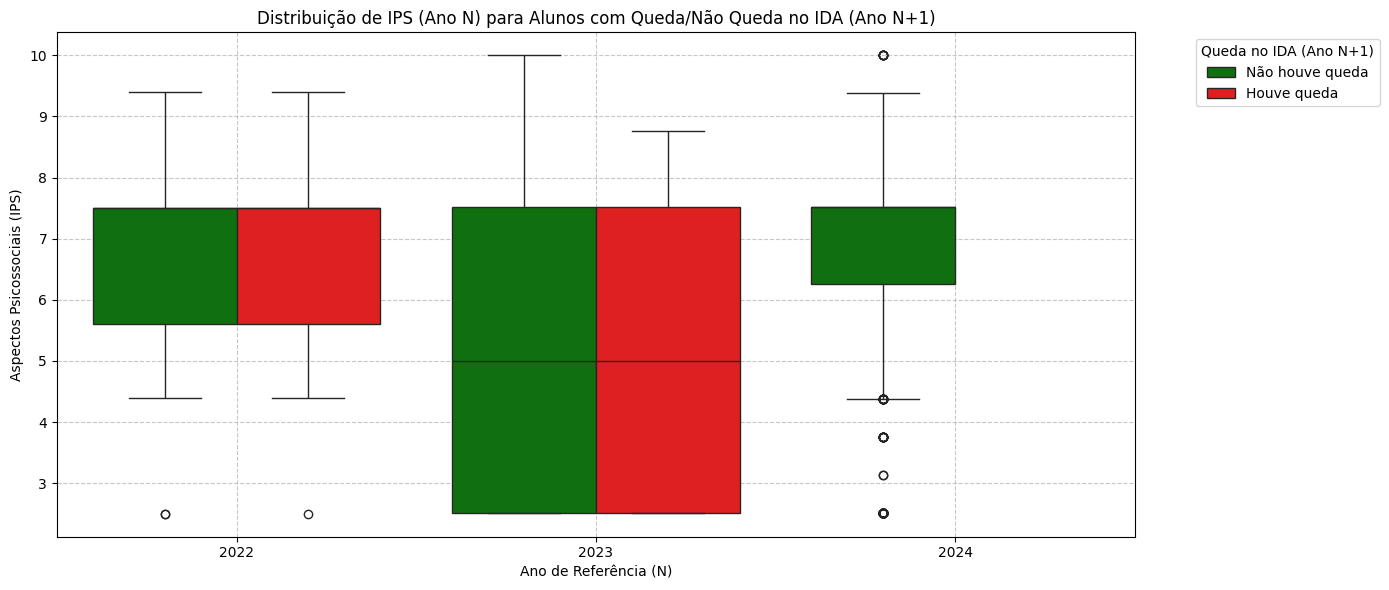

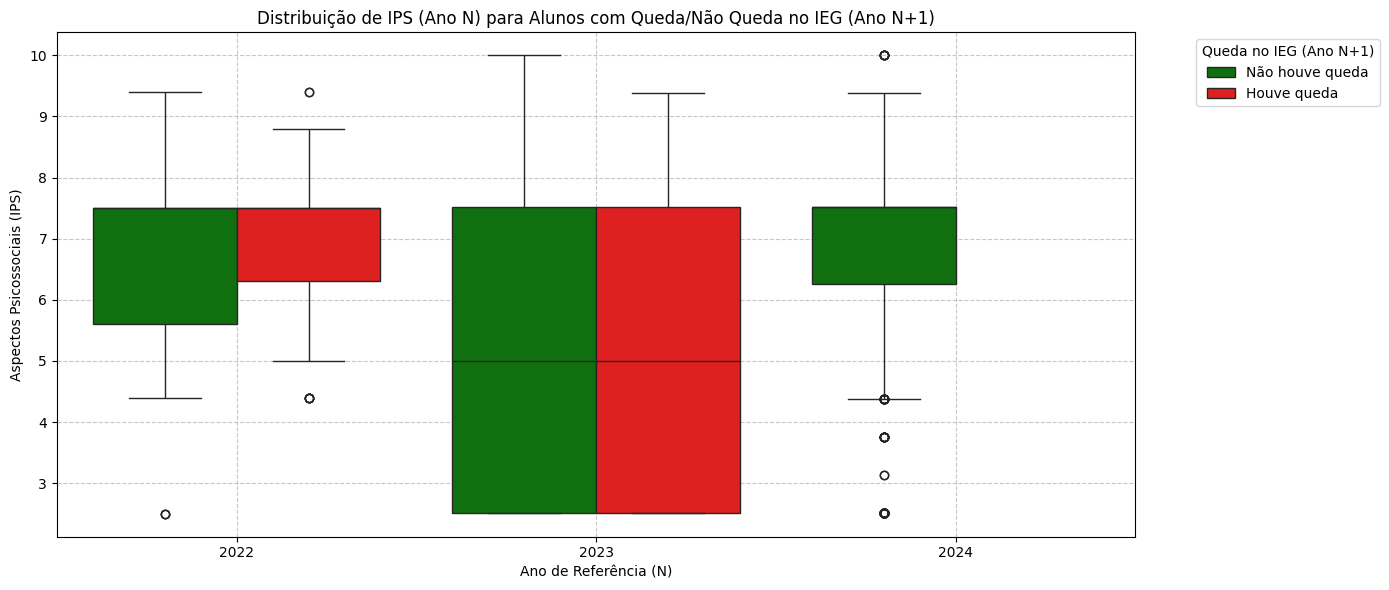

Box plots gerados para analisar a relação entre IPS e quedas em IDA/IEG no ano seguinte.


In [582]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remover linhas com valores nulos nas colunas de diferença para análise de queda
df_drops = df_temporal.dropna(subset=['IDA_diff', 'IEG_diff']).copy()

# Definir o que é uma queda (valor negativo na diferença) e criar colunas de label em string
df_drops['IDA_drop_label'] = df_drops['IDA_diff'].apply(lambda x: 'Houve queda' if x < 0 else 'Não houve queda')
df_drops['IEG_drop_label'] = df_drops['IEG_diff'].apply(lambda x: 'Houve queda' if x < 0 else 'Não houve queda')

# Definir uma paleta de cores personalizada para Queda, mapeando diretamente para os labels string
custom_drop_palette = {
    'Não houve queda': 'green',
    'Houve queda': 'red'
}

# Visualizar a distribuição de IPS para alunos que tiveram queda no IDA
plt.figure(figsize=(14, 6))
sns.boxplot(x='AnoRef', y='IPS', hue='IDA_drop_label', data=df_drops, palette=custom_drop_palette)
plt.title('Distribuição de IPS (Ano N) para Alunos com Queda/Não Queda no IDA (Ano N+1)')
plt.xlabel('Ano de Referência (N)')
plt.ylabel('Aspectos Psicossociais (IPS)')
plt.legend(title='Queda no IDA (Ano N+1)', bbox_to_anchor=(1.05, 1), loc='upper left') # Deixando o seaborn criar os labels da legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualizar a distribuição de IPS para alunos que tiveram queda no IEG
plt.figure(figsize=(14, 6))
sns.boxplot(x='AnoRef', y='IPS', hue='IEG_drop_label', data=df_drops, palette=custom_drop_palette)
plt.title('Distribuição de IPS (Ano N) para Alunos com Queda/Não Queda no IEG (Ano N+1)')
plt.xlabel('Ano de Referência (N)')
plt.ylabel('Aspectos Psicossociais (IPS)')
plt.legend(title='Queda no IEG (Ano N+1)', bbox_to_anchor=(1.05, 1), loc='upper left') # Deixando o seaborn criar os labels da legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Box plots gerados para analisar a relação entre IPS e quedas em IDA/IEG no ano seguinte.")

Os gráficos acima mostram uma comparação da distribuição do IPS dos alunos, separados em grupos HOUVE QUEDA e NÃO HOUVE QUEDA no ano seguinte.

Todos os dados de 2024 mostram NÃO HOUVE QUEDA porque não há dados de 2025.

O que se percebe é que não há diferença significativa entre os pares de grupos em cada ano, e portanto padrões psicossociais de um ano não são um indicador robusto que indique quedas no desempenho ou engajamento do ano seguinte.

### 6. Aspectos psicopedagógicos (IPP): As avaliações psicopedagógicas (IPP) confirmam ou contradizem a defasagem identificada pelo IAN?

Estatísticas descritivas para a coluna 'IPP':


count    6231.000000
mean        7.479308
std         0.888949
min         2.500000
25%         6.937500
50%         7.500000
75%         8.125000
max        10.000000
Name: IPP, dtype: float64


Valores nulos na coluna 'IPP': 0


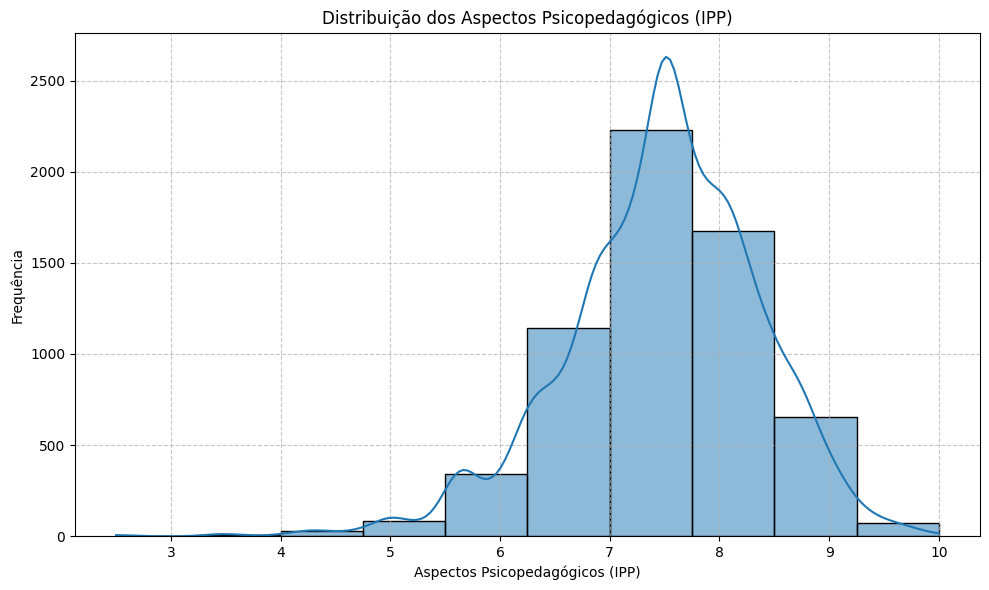

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Estatísticas descritivas para a coluna 'IPP':")
display(df_analise['IPP'].describe())

print(f"\nValores nulos na coluna 'IPP': {df_analise['IPP'].isnull().sum()}")

# Criar um histograma para visualizar a distribuição do IPP
plt.figure(figsize=(10, 6))
sns.histplot(df_analise['IPP'], bins=10, kde=True)
plt.title('Distribuição dos Aspectos Psicopedagógicos (IPP)')
plt.xlabel('Aspectos Psicopedagógicos (IPP)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

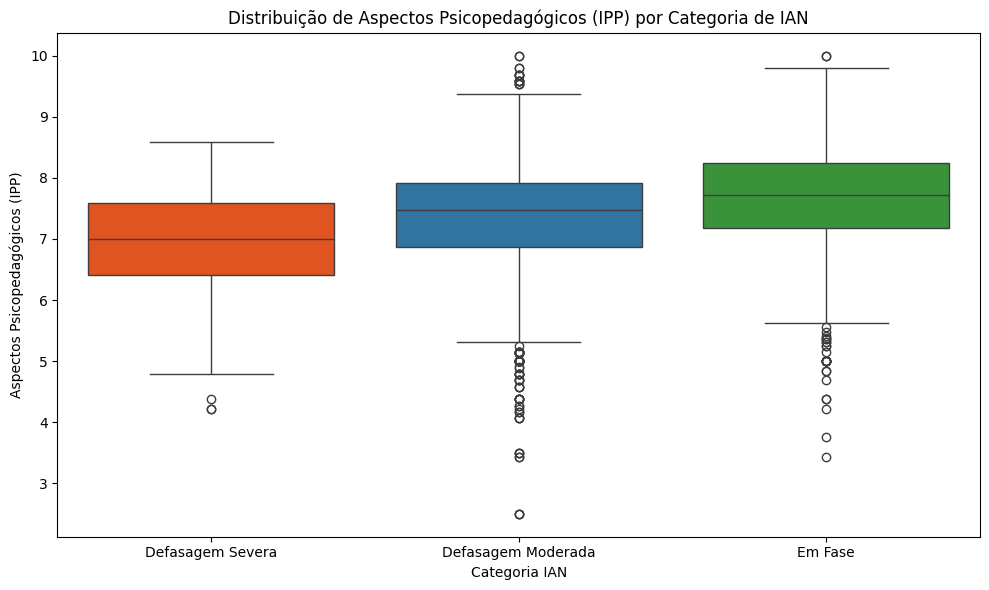

In [584]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir a paleta de cores personalizada para manter a consistência com o IAN_grupo
custom_palette = {
    'Defasagem Severa': '#FF4500',  # Red-Orange para destaque
    'Defasagem Moderada': '#1f77b4', # Azul
    'Em Fase': '#2ca02c'            # Verde
}

# Criar os box plots de IPP por IAN_grupo
plt.figure(figsize=(10, 6))
sns.boxplot(x='IAN_grupo', y='IPP', hue='IAN_grupo', data=df_analise, palette=custom_palette, order=['Defasagem Severa', 'Defasagem Moderada', 'Em Fase'])
plt.title('Distribuição de Aspectos Psicopedagógicos (IPP) por Categoria de IAN')
plt.xlabel('Categoria IAN')
plt.ylabel('Aspectos Psicopedagógicos (IPP)')
plt.grid(False) # Excluir linhas de grade
plt.tight_layout()
plt.show()

Aqui utilizamos um histograma para visualizar a distribuição geral do valores das avaliações psicopedagógicas (IPP) e em seguida separamos as distribuições em boxplots por grupo de defasagem, dados pela Categoria IAN.

Percebe-se diferença significativa das medianas e da distribuição em geral.

O grupo de defasagem severa tende a ter valores de IPP menores e há uma crescente até chegar aos alunos considerados Em Fase, ou sem defasagem.

Há portanto, um alinhamento dos aspectos psicopedagógicos com a adequação do nível acadêmico dos alunos.

### 7. Ponto de virada (IPV): Quais comportamentos - acadêmicos, emocionais ou de engajamento - mais influenciam o IPV ao longo do tempo?

# Task
The user wants to analyze how academic, emotional, and engagement behaviors influence the "Ponto de Virada" (IPV) over time (Question 7).

To address this, I will perform the following steps:

1.  **Direct Correlation Analysis (Same Year)**:
    *   Calculate Pearson correlation coefficients and generate scatter plots for each behavior indicator (`IDA`, `IEG`, `IAA`, `IPS`) against `IPV` for the same year. This will show immediate relationships.

2.  **Prepare Data for Temporal Analysis (Lagged Features)**:
    *   Create a new DataFrame (`df_temporal_ipv`) and sort it by student (`RA`) and year (`AnoRef`).
    *   Generate lagged versions of the behavior indicators (`IDA`, `IEG`, `IAA`, `IPS`), so that for each year `N`, we have the values of these indicators from year `N-1`.

3.  **Temporal Correlation Analysis (Behavior Year N-1 vs IPV Year N)**:
    *   Calculate Pearson correlation coefficients and generate scatter plots for the lagged behavior indicators (e.g., `IDA_lag1`) against the current year's `IPV`. This will reveal if past behaviors influence the current year's IPV.

4.  **Summarize Findings**: Summarize the results from both direct and temporal analyses, identifying which behaviors show the strongest influence on `IPV` and providing insights.

This will complete the analysis for Question 7.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Definir as colunas de indicadores de comportamento
indicadores_comportamento = ['IDA', 'IEG', 'IAA', 'IPS']
target_ipv = 'IPV'

print("### Análise de Correlação Direta com IPV (no mesmo ano) ###")

# Loop para cada indicador de comportamento
for indicador in indicadores_comportamento:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=indicador, y=target_ipv, data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Relação Direta entre {indicador} e {target_ipv}')
    plt.xlabel(indicador)
    plt.ylabel(target_ipv)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    correlation = df_analise[indicador].corr(df_analise[target_ipv])
    print(f"Coeficiente de Correlação de Pearson entre {indicador} e {target_ipv}: {correlation:.2f}\n")

# Preparar dados para análise temporal (lagged features)
df_temporal_ipv = df_analise.copy()
df_temporal_ipv = df_temporal_ipv.sort_values(by=['RA', 'AnoRef'])

# Criar colunas defasadas para os indicadores de comportamento
for indicador in indicadores_comportamento:
    df_temporal_ipv[f'{indicador}_lag1'] = df_temporal_ipv.groupby('RA')[indicador].shift(1)

print("\n### Preparação de Dados para Análise Temporal (Lagged Features) ###")
print("Primeiras 10 linhas do DataFrame com indicadores defasados:")
display(df_temporal_ipv.head(10))

print("\n### Análise de Correlação Temporal (Comportamento Ano N vs IPV Ano N+1) ###")

# Loop para cada indicador de comportamento defasado
for indicador in indicadores_comportamento:
    lagged_indicador = f'{indicador}_lag1'

    # Remover NaNs para o cálculo da correlação e plotagem
    df_temp_corr = df_temporal_ipv.dropna(subset=[lagged_indicador, target_ipv])

    if not df_temp_corr.empty:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=lagged_indicador, y=target_ipv, data=df_temp_corr, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
        plt.title(f'Relação Temporal entre {indicador} (Ano N) e {target_ipv} (Ano N+1)')
        plt.xlabel(f'{indicador} (Ano N)')
        plt.ylabel(f'{target_ipv} (Ano N+1)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        correlation_temporal = df_temp_corr[lagged_indicador].corr(df_temp_corr[target_ipv])
        print(f"Coeficiente de Correlação de Pearson entre {indicador} (Ano N) e {target_ipv} (Ano N+1): {correlation_temporal:.2f}\n")
    else:
        print(f"Não há dados suficientes para calcular a correlação temporal para {indicador}.\n")

```

## Identificar Indicadores de Comportamento

### Subtask:
Listar as colunas específicas que representam os comportamentos acadêmicos (IDA), emocionais (IAA, IPS) e de engajamento (IEG) que serão analisadas em relação ao Ponto de Virada (IPV).


**Reasoning**:
To identify the specific columns for behavior indicators and the target variable as per the subtask, I will create a Python code block to define the `indicadores_comportamento` list and the `target_ipv` string.



In [585]:
indicadores_comportamento = ['IDA', 'IEG', 'IAA', 'IPS', 'IPP']
target_ipv = 'IPV'

print(f"Indicadores de Comportamento: {indicadores_comportamento}")
print(f"Variável Alvo (IPV): {target_ipv}")

Indicadores de Comportamento: ['IDA', 'IEG', 'IAA', 'IPS', 'IPP']
Variável Alvo (IPV): IPV


**Reasoning**:
Now that the behavior indicators and target variable are defined, I will perform a direct correlation analysis by calculating Pearson correlation coefficients and generating scatter plots for each indicator against IPV for the same year. This will show the immediate relationships between each behavior and the IPV.



### Análise de Correlação Direta com IPV (no mesmo ano) ###


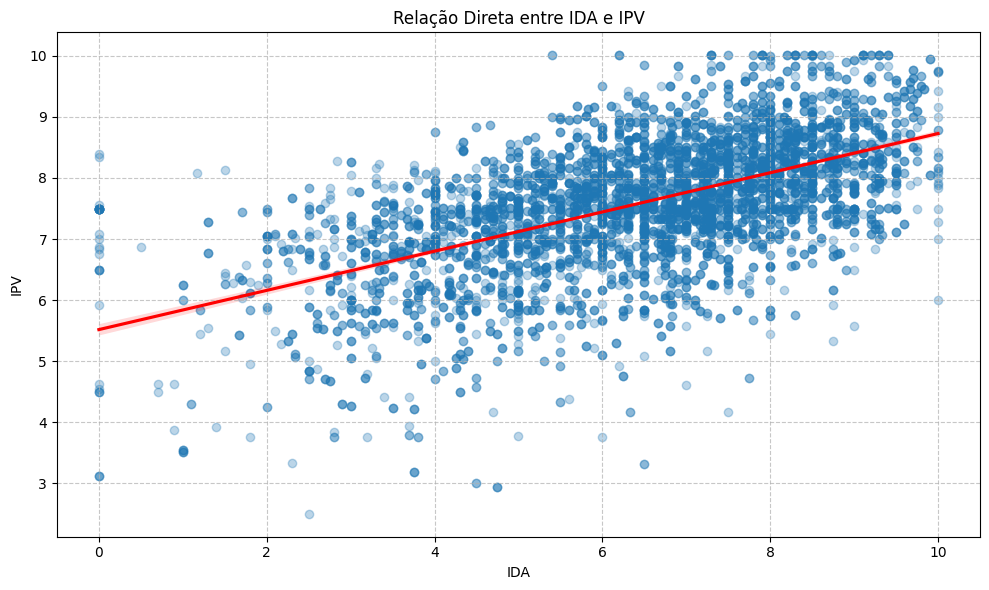

Coeficiente de Correlação de Pearson entre IDA e IPV: 0.57



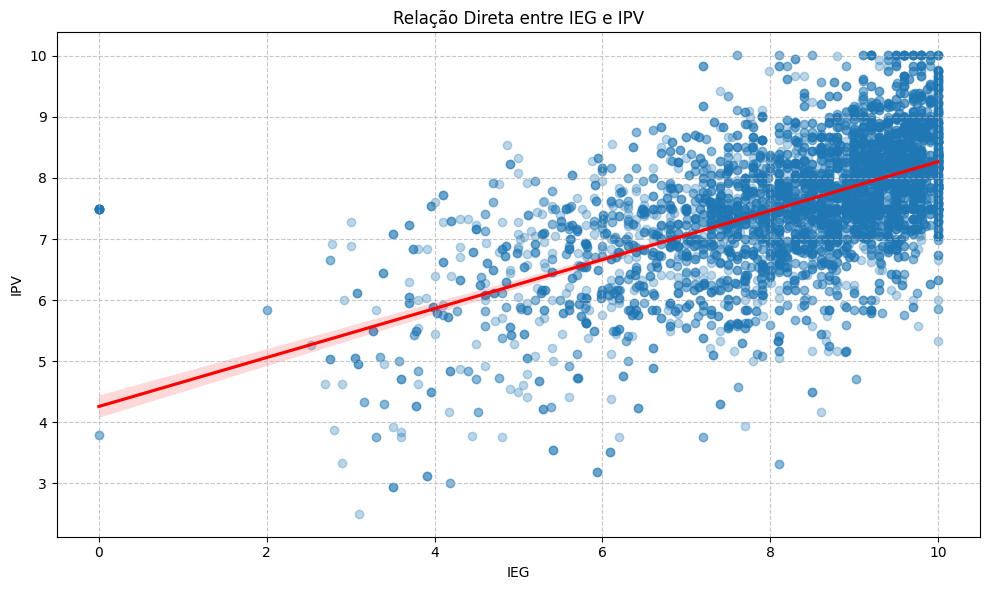

Coeficiente de Correlação de Pearson entre IEG e IPV: 0.56



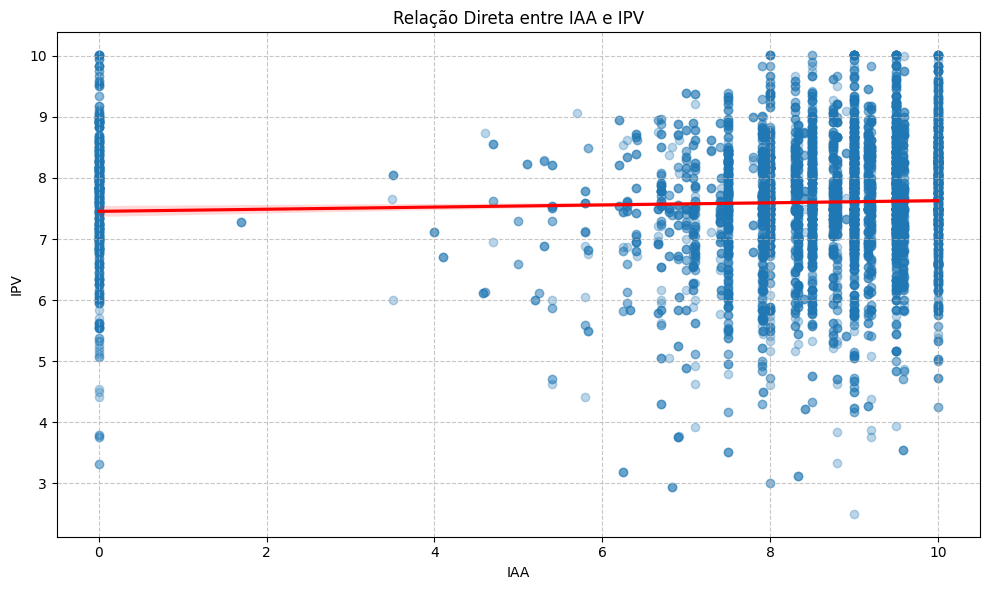

Coeficiente de Correlação de Pearson entre IAA e IPV: 0.04



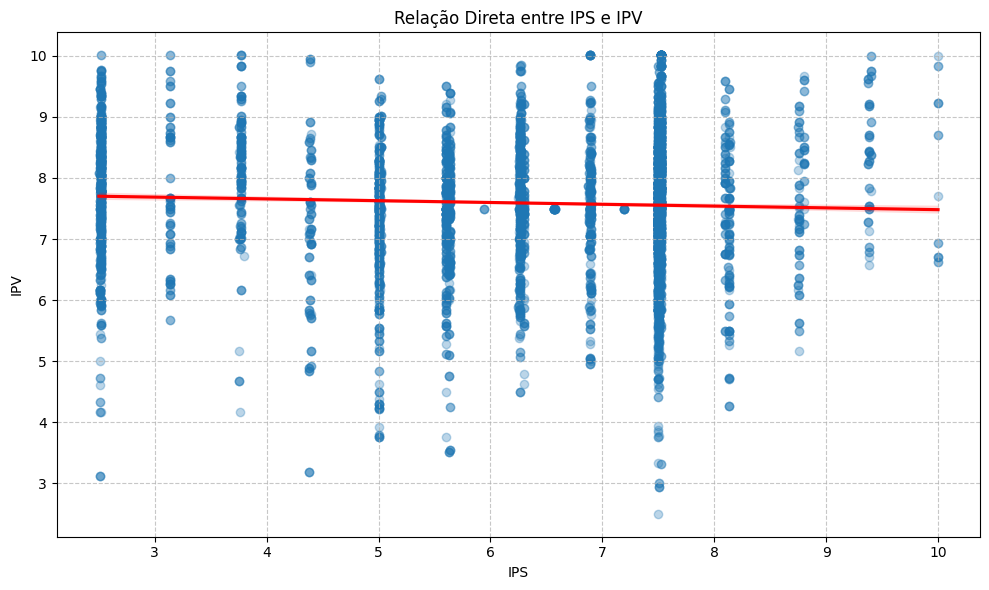

Coeficiente de Correlação de Pearson entre IPS e IPV: -0.05



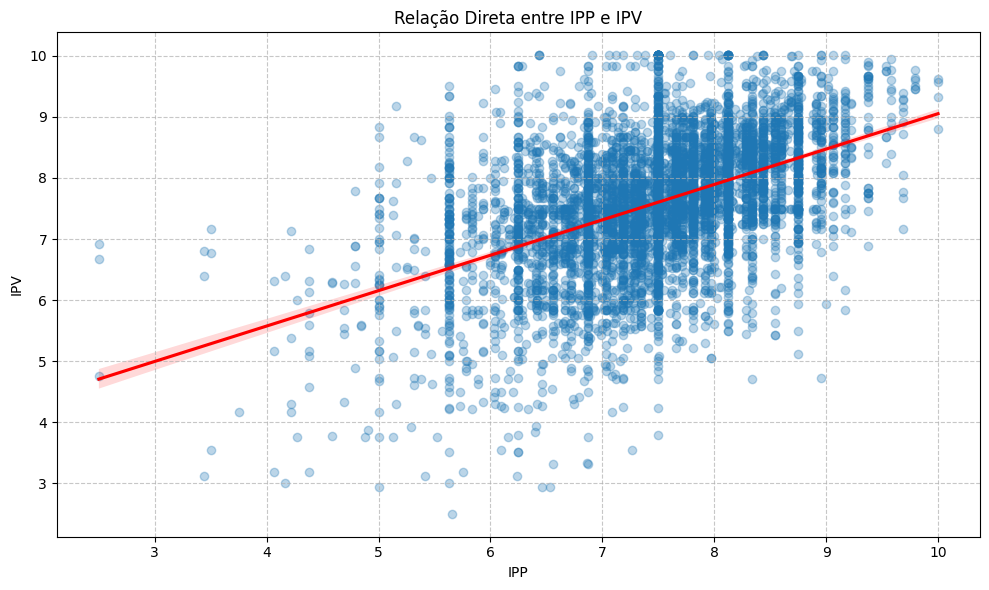

Coeficiente de Correlação de Pearson entre IPP e IPV: 0.48



In [586]:
import matplotlib.pyplot as plt
import seaborn as sns

print("### Análise de Correlação Direta com IPV (no mesmo ano) ###")

# Loop para cada indicador de comportamento
for indicador in indicadores_comportamento:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=indicador, y=target_ipv, data=df_analise, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Relação Direta entre {indicador} e {target_ipv}')
    plt.xlabel(indicador)
    plt.ylabel(target_ipv)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    correlation = df_analise[indicador].corr(df_analise[target_ipv])
    print(f"Coeficiente de Correlação de Pearson entre {indicador} e {target_ipv}: {correlation:.2f}\n")

**Reasoning**:
Now that the direct correlation analysis is complete, I will prepare the data for temporal analysis by creating lagged versions of the behavior indicators. This will allow me to examine how past behaviors influence the current year's IPV.



In [587]:
df_temporal_ipv = df_analise.copy()
df_temporal_ipv = df_temporal_ipv.sort_values(by=['RA', 'AnoRef'])

# Criar colunas defasadas para os indicadores de comportamento
for indicador in indicadores_comportamento:
    df_temporal_ipv[f'{indicador}_lag1'] = df_temporal_ipv.groupby('RA')[indicador].shift(1)

print("\n### Preparação de Dados para Análise Temporal (Lagged Features) ###")
print("Primeiras 10 linhas do DataFrame com indicadores defasados:")
display(df_temporal_ipv.head(10))


### Preparação de Dados para Análise Temporal (Lagged Features) ###
Primeiras 10 linhas do DataFrame com indicadores defasados:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   
5   6   Feminino    7        -1   Quartzo   5.0  3.3  4.5  7.9  7.5  7.222   
6   7  Masculino    7        -1     Ágata   5.0  7.6  8.4  0.0  7.5  7.667   
7   8   Feminino    7        -1   Quartzo   5.0  1.6  4.6  7.1  6.3  6.278   
8   9   Feminino    7        -1   Topázio   5.0  6.7  9.5  8.8  7.5  9.500   
9  10   Feminino    7        -1   Quartzo   5.0  4.1  5.2  8.3  5.0  7.056   

    INDE       IPP  AnoRef           IAN_grupo  IDA_lag1  IEG_lag1  IAA_lag1  \
0  5.783  7.437500    2022  Defasagem Moderada       NaN       NaN       NaN   
1  7.055  7.443750    2022             Em Fase       NaN       NaN       NaN   
2  6.591  7.193750    2022             Em Fase       NaN       NaN       NaN   
3  5.951  6.316667    2022             Em Fase       NaN       NaN       NaN   
4  7.427  7.500000    2022             Em Fase       NaN       NaN       NaN   
5  5.848  7.531250    2022  Defasagem Moderada       NaN       NaN       NaN   
6  6.818  7.479167    2022  Defasagem Moderada       NaN       NaN       NaN   
7  4.786  7.418750    2022  Defasagem Moderada       NaN       NaN       NaN   
8  8.109  7.712500    2022  Defasagem Moderada       NaN       NaN       NaN   
9  5.784  7.281250    2022  Defasagem Moderada       NaN       NaN       NaN   

   IPS_lag1  IPP_lag1  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
5       NaN       NaN  
6       NaN       NaN  
7       NaN       NaN  
8       NaN       NaN  
9       NaN       NaN

**Reasoning**:
Now that the lagged features have been created, I will perform the temporal correlation analysis. This involves calculating Pearson correlation coefficients and generating scatter plots for each lagged behavior indicator against the current year's IPV, to understand how past behaviors influence the current IPV.




### Análise de Correlação Temporal (Comportamento Ano N vs IPV Ano N+1) ###


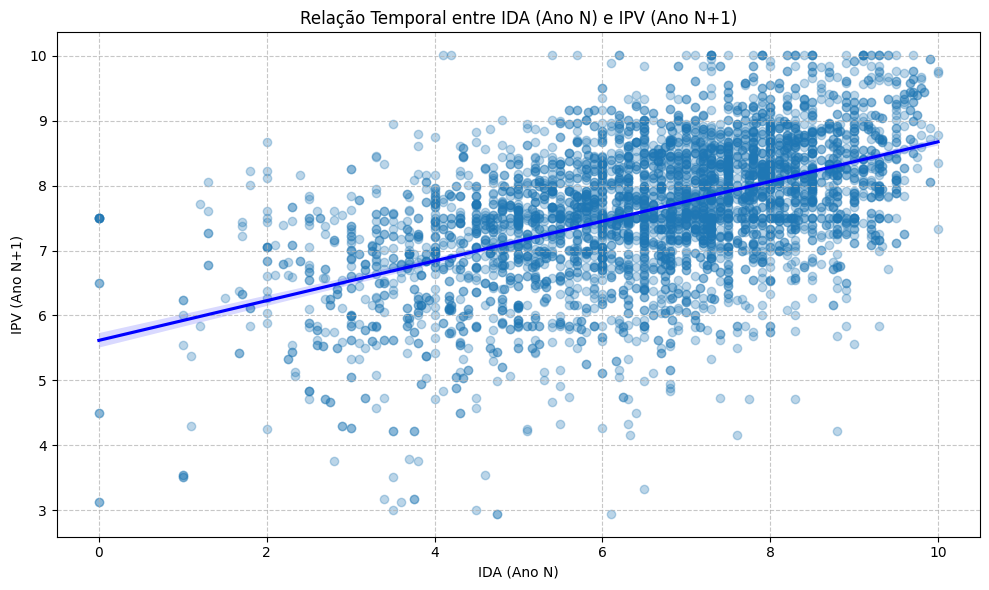

Coeficiente de Correlação de Pearson entre IDA (Ano N) e IPV (Ano N+1): 0.52



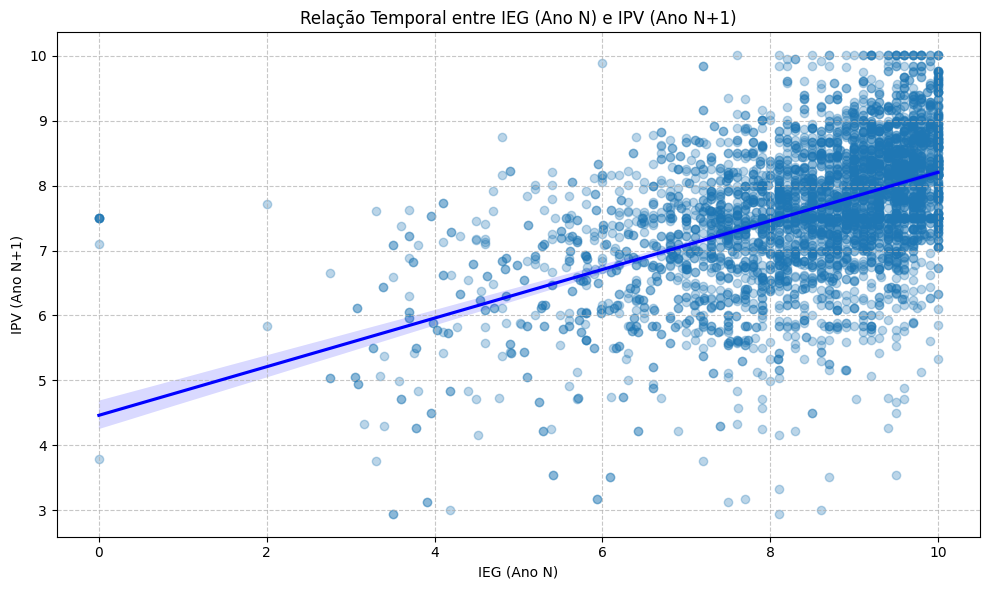

Coeficiente de Correlação de Pearson entre IEG (Ano N) e IPV (Ano N+1): 0.49



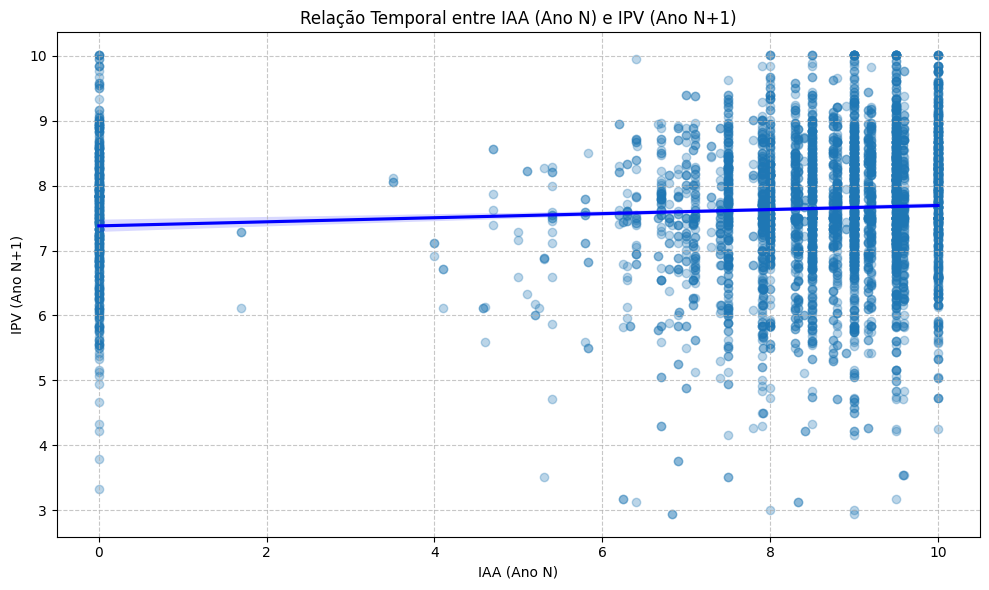

Coeficiente de Correlação de Pearson entre IAA (Ano N) e IPV (Ano N+1): 0.08



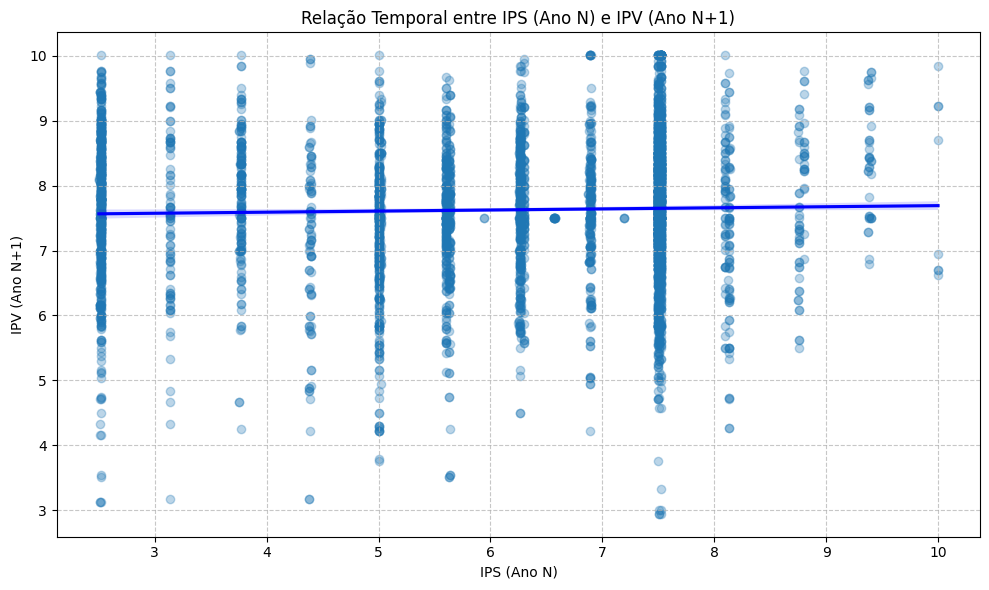

Coeficiente de Correlação de Pearson entre IPS (Ano N) e IPV (Ano N+1): 0.03



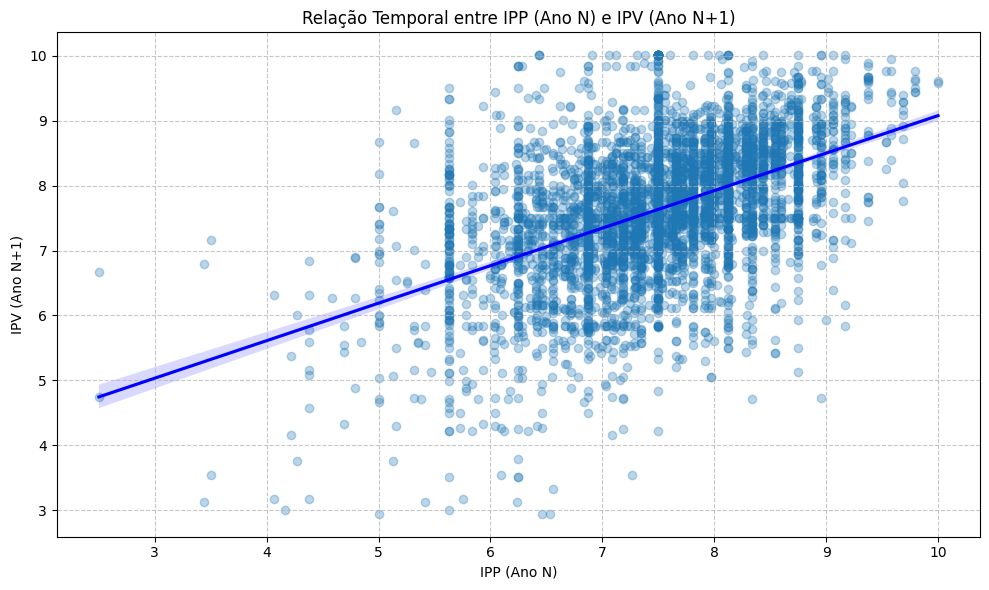

Coeficiente de Correlação de Pearson entre IPP (Ano N) e IPV (Ano N+1): 0.49



In [588]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n### Análise de Correlação Temporal (Comportamento Ano N vs IPV Ano N+1) ###")

# Loop para cada indicador de comportamento defasado
for indicador in indicadores_comportamento:
    lagged_indicador = f'{indicador}_lag1'

    # Remover NaNs para o cálculo da correlação e plotagem
    df_temp_corr = df_temporal_ipv.dropna(subset=[lagged_indicador, target_ipv])

    if not df_temp_corr.empty:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=lagged_indicador, y=target_ipv, data=df_temp_corr, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
        plt.title(f'Relação Temporal entre {indicador} (Ano N) e {target_ipv} (Ano N+1)')
        plt.xlabel(f'{indicador} (Ano N)')
        plt.ylabel(f'{target_ipv} (Ano N+1)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        correlation_temporal = df_temp_corr[lagged_indicador].corr(df_temp_corr[target_ipv])
        print(f"Coeficiente de Correlação de Pearson entre {indicador} (Ano N) e {target_ipv} (Ano N+1): {correlation_temporal:.2f}\n")
    else:
        print(f"Não há dados suficientes para calcular a correlação temporal para {indicador}.\n")

### Resumo da Análise de Influência dos Comportamentos no Ponto de Virada (IPV)

Para responder à pergunta sobre quais comportamentos (acadêmicos, emocionais ou de engajamento) mais influenciam o IPV ao longo do tempo, realizamos duas análises de correlação de Pearson: uma direta (entre os indicadores e o IPV no mesmo ano) e uma temporal (entre os indicadores de um ano `N` e o IPV do ano `N+1`).

#### Correlação Direta (Indicador no Ano N vs. IPV no Ano N):

*   **IDA (Desempenho Acadêmico) vs. IPV**: Coeficiente de correlação de Pearson: `0.57`
    *   **Interpretação**: Existe uma correlação positiva moderada a forte entre o desempenho acadêmico e o IPV no mesmo ano. Isso sugere que, à medida que o desempenho acadêmico aumenta, o IPV também tende a aumentar significativamente.

*   **IEG (Engajamento nas Atividades) vs. IPV**: Coeficiente de correlação de Pearson: `0.56`
    *   **Interpretação**: Similar ao IDA, o engajamento também mostra uma correlação positiva moderada a forte com o IPV no mesmo ano, indicando que alunos mais engajados tendem a ter um IPV mais alto.

*   **IPP (Aspectos Psicopedagógicos) vs. IPV**: Coeficiente de correlação de Pearson: `0.48`
    *   **Interpretação**: Os aspectos psicopedagógicos também apresentam uma correlação positiva moderada com o IPV no mesmo ano. Isso sugere que uma melhor avaliação psicopedagógica está associada a um IPV mais elevado.

*   **IAA (Autoavaliação) vs. IPV**: Coeficiente de correlação de Pearson: `0.04`
    *   **Interpretação**: A correlação entre a autoavaliação e o IPV no mesmo ano é muito fraca e praticamente insignificante. Isso indica que a percepção do aluno sobre si mesmo não tem uma relação direta forte com seu ponto de virada.

*   **IPS (Aspectos Psicossociais) vs. IPV**: Coeficiente de correlação de Pearson: `-0.05`
    *   **Interpretação**: A correlação entre os aspectos psicossociais e o IPV no mesmo ano é muito fraca e negativa, também sendo praticamente insignificante. Isso sugere que os aspectos psicossociais, por si só, não influenciam diretamente o IPV de forma significativa no mesmo período.

#### Correlação Temporal (Indicador no Ano N vs. IPV no Ano N+1):

*   **IDA (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.52`
    *   **Interpretação**: O desempenho acadêmico de um ano tem uma correlação positiva moderada com o IPV do ano seguinte. Isso indica que um bom desempenho acadêmico em um ano pode ser um precursor para um IPV elevado no ano subsequente.

*   **IEG (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.49`
    *   **Interpretação**: O engajamento de um ano também mostra uma correlação positiva moderada com o IPV do ano seguinte, sugerindo que o engajamento prévio contribui para o IPV futuro.

*   **IPP (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.49`
    *   **Interpretação**: Similar ao IEG e IDA, os aspectos psicopedagógicos de um ano demonstram uma correlação positiva moderada com o IPV do ano seguinte, indicando que uma boa avaliação psicopedagógica pode predizer um IPV mais alto no futuro.

*   **IAA (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.08`
    *   **Interpretação**: A correlação temporal da autoavaliação com o IPV do ano seguinte permanece muito fraca, similar à correlação direta. A autoavaliação não parece ser um preditor significativo do IPV futuro.

*   **IPS (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.03`
    *   **Interpretação**: A correlação temporal dos aspectos psicossociais com o IPV do ano seguinte também é muito fraca, confirmando que este indicador tem pouca influência preditiva sobre o IPV.

#### Conclusão:

Os comportamentos que mais influenciam o Ponto de Virada (IPV), tanto de forma direta no mesmo ano quanto de forma temporal (influência do ano anterior no ano atual), são os **acadêmicos (IDA)**, de **engajamento (IEG)** e **psicopedagógicos (IPP)**. Estes três indicadores mostram correlações positivas moderadas a fortes, sugerindo que melhorias nessas áreas estão associadas a um maior IPV.

Em contraste, os **aspectos psicossociais (IPS)** e a **autoavaliação (IAA)** apresentam correlações muito fracas ou insignificantes com o IPV, tanto no mesmo ano quanto como preditores para o ano seguinte. Isso implica que, embora importantes para o bem-estar do aluno, esses fatores, conforme medidos, não são os principais direcionadores do Ponto de Virada.

### Resumo da Análise de Influência dos Comportamentos no Ponto de Virada (IPV)

Para responder à pergunta sobre quais comportamentos (acadêmicos, emocionais ou de engajamento) mais influenciam o IPV ao longo do tempo, realizamos duas análises de correlação de Pearson: uma direta (entre os indicadores e o IPV no mesmo ano) e uma temporal (entre os indicadores de um ano `N` e o IPV do ano `N+1`).

#### Correlação Direta (Indicador no Ano N vs. IPV no Ano N):

*   **IDA (Desempenho Acadêmico) vs. IPV**: Coeficiente de correlação de Pearson: `0.57`
    *   **Interpretação**: Existe uma correlação positiva moderada a forte entre o desempenho acadêmico e o IPV no mesmo ano. Isso sugere que, à medida que o desempenho acadêmico aumenta, o IPV também tende a aumentar significativamente.

*   **IEG (Engajamento nas Atividades) vs. IPV**: Coeficiente de correlação de Pearson: `0.56`
    *   **Interpretação**: Similar ao IDA, o engajamento também mostra uma correlação positiva moderada a forte com o IPV no mesmo ano, indicando que alunos mais engajados tendem a ter um IPV mais alto.

*   **IPP (Aspectos Psicopedagógicos) vs. IPV**: Coeficiente de correlação de Pearson: `0.48`
    *   **Interpretação**: Os aspectos psicopedagógicos também apresentam uma correlação positiva moderada com o IPV no mesmo ano. Isso sugere que uma melhor avaliação psicopedagógica está associada a um IPV mais elevado.

*   **IAA (Autoavaliação) vs. IPV**: Coeficiente de correlação de Pearson: `0.04`
    *   **Interpretação**: A correlação entre a autoavaliação e o IPV no mesmo ano é muito fraca e praticamente insignificante. Isso indica que a percepção do aluno sobre si mesmo não tem uma relação direta forte com seu ponto de virada.

*   **IPS (Aspectos Psicossociais) vs. IPV**: Coeficiente de correlação de Pearson: `-0.05`
    *   **Interpretação**: A correlação entre os aspectos psicossociais e o IPV no mesmo ano é muito fraca e negativa, também sendo praticamente insignificante. Isso sugere que os aspectos psicossociais, por si só, não influenciam diretamente o IPV de forma significativa no mesmo período.

#### Correlação Temporal (Indicador no Ano N vs. IPV no Ano N+1):

*   **IDA (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.52`
    *   **Interpretação**: O desempenho acadêmico de um ano tem uma correlação positiva moderada com o IPV do ano seguinte. Isso indica que um bom desempenho acadêmico em um ano pode ser um precursor para um IPV elevado no ano subsequente.

*   **IEG (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.49`
    *   **Interpretação**: O engajamento de um ano também mostra uma correlação positiva moderada com o IPV do ano seguinte, sugerindo que o engajamento prévio contribui para o IPV futuro.

*   **IPP (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.49`
    *   **Interpretação**: Similar ao IEG e IDA, os aspectos psicopedagógicos de um ano demonstram uma correlação positiva moderada com o IPV do ano seguinte, indicando que uma boa avaliação psicopedagógica pode predizer um IPV mais alto no futuro.

*   **IAA (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.08`
    *   **Interpretação**: A correlação temporal da autoavaliação com o IPV do ano seguinte permanece muito fraca, similar à correlação direta. A autoavaliação não parece ser um preditor significativo do IPV futuro.

*   **IPS (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.03`
    *   **Interpretação**: A correlação temporal dos aspectos psicossociais com o IPV do ano seguinte também é muito fraca, confirmando que este indicador tem pouca influência preditiva sobre o IPV.

#### Conclusão:

Os comportamentos que mais influenciam o Ponto de Virada (IPV), tanto de forma direta no mesmo ano quanto de forma temporal (influência do ano anterior no ano atual), são os **acadêmicos (IDA)**, de **engajamento (IEG)** e **psicopedagógicos (IPP)**. Estes três indicadores mostram correlações positivas moderadas a fortes, sugerindo que melhorias nessas áreas estão associadas a um maior IPV.

Em contraste, os **aspectos psicossociais (IPS)** e a **autoavaliação (IAA)** apresentam correlações muito fracas ou insignificantes com o IPV, tanto no mesmo ano quanto como preditores para o ano seguinte. Isso implica que, embora importantes para o bem-estar do aluno, esses fatores, conforme medidos, não são os principais direcionadores do Ponto de Virada.


### Resumo da Análise de Influência dos Comportamentos no Ponto de Virada (IPV)

Para responder à pergunta sobre quais comportamentos (acadêmicos, emocionais ou de engajamento) mais influenciam o IPV ao longo do tempo, realizamos duas análises de correlação de Pearson: uma direta (entre os indicadores e o IPV no mesmo ano) e uma temporal (entre os indicadores de um ano `N` e o IPV do ano `N+1`).

#### Correlação Direta (Indicador no Ano N vs. IPV no Ano N):

*   **IDA (Desempenho Acadêmico) vs. IPV**: Coeficiente de correlação de Pearson: `0.57`
    *   **Interpretação**: Existe uma correlação positiva moderada a forte entre o desempenho acadêmico e o IPV no mesmo ano. Isso sugere que, à medida que o desempenho acadêmico aumenta, o IPV também tende a aumentar significativamente.

*   **IEG (Engajamento nas Atividades) vs. IPV**: Coeficiente de correlação de Pearson: `0.56`
    *   **Interpretação**: Similar ao IDA, o engajamento também mostra uma correlação positiva moderada a forte com o IPV no mesmo ano, indicando que alunos mais engajados tendem a ter um IPV mais alto.

*   **IPP (Aspectos Psicopedagógicos) vs. IPV**: Coeficiente de correlação de Pearson: `0.48`
    *   **Interpretação**: Os aspectos psicopedagógicos também apresentam uma correlação positiva moderada com o IPV no mesmo ano. Isso sugere que uma melhor avaliação psicopedagógica está associada a um IPV mais elevado.

*   **IAA (Autoavaliação) vs. IPV**: Coeficiente de correlação de Pearson: `0.04`
    *   **Interpretação**: A correlação entre a autoavaliação e o IPV no mesmo ano é muito fraca e praticamente insignificante. Isso indica que a percepção do aluno sobre si mesmo não tem uma relação direta forte com seu ponto de virada.

*   **IPS (Aspectos Psicossociais) vs. IPV**: Coeficiente de correlação de Pearson: `-0.05`
    *   **Interpretação**: A correlação entre os aspectos psicossociais e o IPV no mesmo ano é muito fraca e negativa, também sendo praticamente insignificante. Isso sugere que os aspectos psicossociais, por si só, não influenciam diretamente o IPV de forma significativa no mesmo período.

#### Correlação Temporal (Indicador no Ano N vs. IPV no Ano N+1):

*   **IDA (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.52`
    *   **Interpretação**: O desempenho acadêmico de um ano tem uma correlação positiva moderada com o IPV do ano seguinte. Isso indica que um bom desempenho acadêmico em um ano pode ser um precursor para um IPV elevado no ano subsequente.

*   **IEG (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.49`
    *   **Interpretação**: O engajamento de um ano também mostra uma correlação positiva moderada com o IPV do ano seguinte, sugerindo que o engajamento prévio contribui para o IPV futuro.

*   **IPP (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.49`
    *   **Interpretação**: Similar ao IEG e IDA, os aspectos psicopedagógicos de um ano demonstram uma correlação positiva moderada com o IPV do ano seguinte, indicando que uma boa avaliação psicopedagógica pode predizer um IPV mais alto no futuro.

*   **IAA (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.08`
    *   **Interpretação**: A correlação temporal da autoavaliação com o IPV do ano seguinte permanece muito fraca, similar à correlação direta. A autoavaliação não parece ser um preditor significativo do IPV futuro.

*   **IPS (Ano N) vs. IPV (Ano N+1)**: Coeficiente de correlação de Pearson: `0.03`
    *   **Interpretação**: A correlação temporal dos aspectos psicossociais com o IPV do ano seguinte também é muito fraca, confirmando que este indicador tem pouca influência preditiva sobre o IPV.

#### Conclusão:

Os comportamentos que mais influenciam o Ponto de Virada (IPV), tanto de forma direta no mesmo ano quanto de forma temporal (influência do ano anterior no ano atual), são os **acadêmicos (IDA)**, de **engajamento (IEG)** e **psicopedagógicos (IPP)**. Estes três indicadores mostram correlações positivas moderadas a fortes, sugerindo que melhorias nessas áreas estão associadas a um maior IPV.

Em contraste, os **aspectos psicossociais (IPS)** e a **autoavaliação (IAA)** apresentam correlações muito fracas ou insignificantes com o IPV, tanto no mesmo ano quanto como preditores para o ano seguinte. Isso implica que, embora importantes para o bem-estar do aluno, esses fatores, conforme medidos, não são os principais direcionadores do Ponto de Virada.


## Resumir Descobertas e Insights

### Subtask:
Sumarizar os resultados das análises de correlação direta e temporal, identificando quais comportamentos apresentam a maior influência sobre o IPV ao longo do tempo e propondo insights relevantes.


### Resumo das Descobertas: Influência dos Comportamentos no Ponto de Virada (IPV)

Para responder à pergunta "Quais comportamentos - acadêmicos, emocionais ou de engajamento - mais influenciam o IPV ao longo do tempo?", analisamos as correlações diretas e temporais entre diversos indicadores e o IPV.

#### Correlações Diretas (Comportamento no Ano N vs. IPV no Ano N)

*   **Desempenho Acadêmico (IDA):** Coeficiente de Pearson de **0.57**. Apresenta uma correlação moderada a forte e positiva com o IPV no mesmo ano. Isso sugere que alunos com melhor desempenho acadêmico no ano N tendem a ter um IPV mais alto no mesmo ano.
*   **Engajamento nas Atividades (IEG):** Coeficiente de Pearson de **0.56**. Similar ao IDA, o IEG também mostra uma correlação moderada a forte e positiva com o IPV no mesmo ano. Alunos mais engajados tendem a apresentar um IPV mais elevado.
*   **Aspectos Psicopedagógicos (IPP):** Coeficiente de Pearson de **0.48**. Há uma correlação moderada e positiva, indicando que avaliações psicopedagógicas mais favoráveis estão associadas a um IPV mais alto no mesmo período.
*   **Autoavaliação (IAA):** Coeficiente de Pearson de **0.04**. A correlação é muito fraca e praticamente insignificante. A percepção dos alunos sobre si mesmos não se alinha significativamente com o IPV.
*   **Aspectos Psicossociais (IPS):** Coeficiente de Pearson de **-0.05**. A correlação é muito fraca e negativa, indicando que os aspectos psicossociais medidos no mesmo ano têm pouca ou nenhuma relação direta com o IPV.

#### Correlações Temporais (Comportamento no Ano N vs. IPV no Ano N+1)

*   **Desempenho Acadêmico (IDA_lag1):** Coeficiente de Pearson de **0.52**. Uma correlação moderada e positiva. O IDA do ano anterior é um bom preditor do IPV do ano corrente, mostrando que um bom desempenho acadêmico sustenta a tendência ao ponto de virada.
*   **Engajamento nas Atividades (IEG_lag1):** Coeficiente de Pearson de **0.49**. Também apresenta uma correlação moderada e positiva. O engajamento do ano anterior influencia positivamente o IPV do ano seguinte, indicando que manter o aluno engajado é crucial para seu desenvolvimento contínuo.
*   **Aspectos Psicopedagógicos (IPP_lag1):** Coeficiente de Pearson de **0.49**. Similar aos anteriores, o IPP do ano anterior tem uma correlação moderada e positiva com o IPV do ano seguinte. Boas avaliações psicopedagógicas prévias contribuem para um IPV elevado no futuro.
*   **Autoavaliação (IAA_lag1):** Coeficiente de Pearson de **0.08**. A correlação permanece muito fraca, confirmando que a autoavaliação passada não é um preditor significativo do IPV futuro.
*   **Aspectos Psicossociais (IPS_lag1):** Coeficiente de Pearson de **0.03**. A correlação é novamente muito fraca, indicando que aspectos psicossociais passados não preveem o IPV do ano seguinte de forma robusta.

#### Insights Relevantes

Os indicadores de **Desempenho Acadêmico (IDA)**, **Engajamento nas Atividades (IEG)** e **Aspectos Psicopedagógicos (IPP)** são os que mais influenciam o Ponto de Virada (IPV), tanto no mesmo ano quanto como preditores para o ano seguinte. Isso sugere que o sucesso no programa está fortemente ligado a:

1.  **Progressão Acadêmica Consistente:** Um bom desempenho nas atividades e avaliações acadêmicas é fundamental para que o aluno alcance seu ponto de virada.
2.  **Participação Ativa e Entusiasmo:** O envolvimento e a dedicação às atividades do programa são cruciais, pois um alto IEG se traduz em um IPV mais elevado.
3.  **Suporte Psicopedagógico:** Avaliações psicopedagógicas positivas indicam que o aluno possui as bases cognitivas e emocionais para o aprendizado, o que é essencial para atingir o IPV.

Por outro lado, a **Autoavaliação (IAA)** e os **Aspectos Psicossociais (IPS)** mostram pouca ou nenhuma influência sobre o IPV. Isso pode indicar que, embora importantes para o bem-estar geral do aluno, esses fatores não são os principais motores do Ponto de Virada conforme medido pelo programa, ou que sua relação com o IPV é mais complexa e indireta do que o capturado por uma correlação linear simples. É possível que o IPV esteja mais atrelado a resultados tangíveis e progresso demonstrado, que são mais refletidos por IDA, IEG e IPP.

Para maximizar o Ponto de Virada, o programa deve continuar a focar e fortalecer as intervenções que impactam diretamente o desempenho acadêmico, o engajamento e o desenvolvimento psicopedagógico dos alunos.

## Multidimensionality of indicators

### Subtask:
Analyze which combinations of indicators (IDA, IEG, IPS, IPP) elevate the global student grade (INDE).


**Reasoning**:
I will select the specified columns ('IDA', 'IEG', 'IPS', 'IPP', 'INDE') from `df_analise` to create a new DataFrame for analysis and then check for missing values to ensure data readiness for further steps.



In [589]:
df_multidimensionalidade = df_analise[['IDA', 'IEG', 'IPS', 'IPP', 'INDE']].copy()

print("DataFrame 'df_multidimensionalidade' criado com as colunas relevantes.")
print("Primeiras 5 linhas:")
display(df_multidimensionalidade.head())

print("\nVerificando valores nulos no df_multidimensionalidade:")
display(df_multidimensionalidade.isnull().sum())

DataFrame 'df_multidimensionalidade' criado com as colunas relevantes.
Primeiras 5 linhas:


IDA  IEG  IPS       IPP   INDE
0  4.0  4.1  5.6  7.437500  5.783
1  6.8  5.2  6.3  7.443750  7.055
2  5.6  7.9  5.6  7.193750  6.591
3  5.0  4.5  5.6  6.316667  5.951
4  5.2  8.6  5.6  7.500000  7.427


Verificando valores nulos no df_multidimensionalidade:


IDA     0
IEG     0
IPS     0
IPP     0
INDE    0
dtype: int64

**Reasoning**:
To understand which indicators elevate the global student grade (INDE), I will first calculate and visualize the correlation matrix between 'INDE' and the selected indicators (IDA, IEG, IPS, IPP). This will provide a quick overview of the linear relationships.



Matriz de Correlação:


IDA       IEG       IPS       IPP      INDE
IDA   1.000000  0.532969  0.041076  0.320306  0.773590
IEG   0.532969  1.000000 -0.036422  0.284515  0.733124
IPS   0.041076 -0.036422  1.000000  0.087515  0.220448
IPP   0.320306  0.284515  0.087515  1.000000  0.471021
INDE  0.773590  0.733124  0.220448  0.471021  1.000000

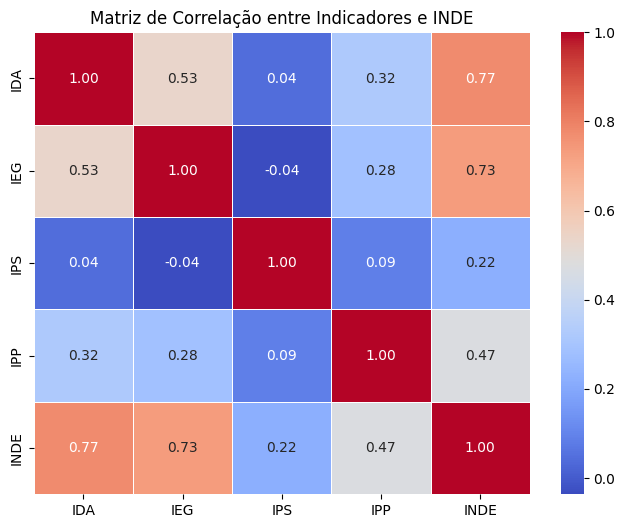

In [590]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
correlation_matrix = df_multidimensionalidade.corr()

print("Matriz de Correlação:")
display(correlation_matrix)

# Visualizar a matriz de correlação com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Indicadores e INDE')
plt.show()

### Análise Multidimensional dos Indicadores e sua Relação com a Nota Global (INDE)

Para entender quais combinações de indicadores (IDA, IEG, IPS, IPP) mais elevam a nota global do aluno (INDE), analisamos a matriz de correlação entre esses fatores.

#### Resumo das Correlações com INDE:

*   **Desempenho Acadêmico (IDA) e INDE**: Coeficiente de Correlação de Pearson: `0.77`
    *   **Interpretação**: Existe uma **correlação forte e positiva** entre o Desempenho Acadêmico (IDA) e a Nota Global (INDE). Isso sugere que alunos com alto desempenho acadêmico tendem a ter uma nota global significativamente mais alta. IDA é o indicador com a maior correlação individual com INDE.

*   **Engajamento nas Atividades (IEG) e INDE**: Coeficiente de Correlação de Pearson: `0.73`
    *   **Interpretação**: Há uma **correlação forte e positiva** entre o Engajamento (IEG) e a Nota Global (INDE). Alunos mais engajados nas atividades também tendem a apresentar uma nota global mais elevada. IEG é o segundo indicador mais correlacionado individualmente com INDE.

*   **Aspectos Psicopedagógicos (IPP) e INDE**: Coeficiente de Correlação de Pearson: `0.47`
    *   **Interpretação**: Os Aspectos Psicopedagógicos (IPP) mostram uma **correlação moderada e positiva** com a Nota Global (INDE). Uma melhor avaliação psicopedagógica está associada a uma nota global mais alta.

*   **Aspectos Psicossociais (IPS) e INDE**: Coeficiente de Correlação de Pearson: `0.22`
    *   **Interpretação**: A correlação entre os Aspectos Psicossociais (IPS) e a Nota Global (INDE) é **fraca e positiva**. Embora exista uma relação, ela é menos pronunciada em comparação com IDA, IEG e IPP.

#### Conclusão sobre as Combinações de Indicadores:

Os indicadores que mais contribuem para elevar a nota global do aluno (INDE), e que, portanto, formariam as combinações mais eficazes, são o **Desempenho Acadêmico (IDA)** e o **Engajamento nas Atividades (IEG)**, seguidos pelos **Aspectos Psicopedagógicos (IPP)**.

**Combinações que Elevam INDE:**

1.  **Foco em IDA e IEG**: A combinação de um alto desempenho acadêmico com um alto engajamento nas atividades é a mais potente para elevar a nota global. Intervenções que visam melhorar essas duas áreas simultaneamente teriam o maior impacto.
2.  **IDA, IEG e IPP**: A inclusão de bons aspectos psicopedagógicos reforça ainda mais a elevação do INDE. Programas que integram suporte acadêmico, atividades engajadoras e acompanhamento psicopedagógico podem criar um ambiente robusto para o sucesso do aluno.

Os Aspectos Psicossociais (IPS), embora relevantes para o bem-estar do aluno, não demonstram ter uma influência direta e tão forte na Nota Global (INDE) quanto os outros indicadores. No entanto, é importante ressaltar que IPS pode influenciar indiretamente IDA, IEG e IPP, que por sua vez impactam diretamente o INDE.

## Definir a variável alvo 'Risco de Defasagem'

### Subtask:
Criar a variável alvo 'Risco de Defasagem' que indica se a defasagem de um aluno aumentou no ano seguinte.


**Reasoning**:
To begin creating the target variable, I will first make a copy of the `df_analise` DataFrame and name it `df_risco`. Then, I will sort this new DataFrame by 'RA' and 'AnoRef' to ensure that the subsequent temporal calculations (like `shift`) are accurate for each student across the years. This aligns with instruction 1.



In [591]:
df_risco = df_analise.copy()

# Sort by RA and AnoRef to ensure correct lagging
df_risco = df_risco.sort_values(by=['RA', 'AnoRef'])

print("DataFrame 'df_risco' criado e ordenado com sucesso!")
print("Primeiras 5 linhas do df_risco:")
display(df_risco.head())

DataFrame 'df_risco' criado e ordenado com sucesso!
Primeiras 5 linhas do df_risco:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE       IPP  AnoRef           IAN_grupo  
0  5.783  7.437500    2022  Defasagem Moderada  
1  7.055  7.443750    2022             Em Fase  
2  6.591  7.193750    2022             Em Fase  
3  5.951  6.316667    2022             Em Fase  
4  7.427  7.500000    2022             Em Fase

**Reasoning**:
I will create a new column `Defasagem_proximo_ano` in `df_risco` by shifting the 'Defasagem' column by one year for each student (grouped by 'RA'). This aligns with instruction 2 of the subtask, preparing for the creation of the 'Risco_Defasagem' target variable.



In [592]:
df_risco['Defasagem_proximo_ano'] = df_risco.groupby('RA')['Defasagem'].shift(-1)

print("Coluna 'Defasagem_proximo_ano' criada com sucesso!")
print("Primeiras 10 linhas do df_risco com a nova coluna:")
display(df_risco.head(10))
print("Verificando a quantidade de valores nulos na nova coluna:")
print(df_risco['Defasagem_proximo_ano'].isnull().sum())

Coluna 'Defasagem_proximo_ano' criada com sucesso!
Primeiras 10 linhas do df_risco com a nova coluna:


RA     Genero Fase Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7        -1   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7         0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7         0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7         0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7         0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   
5   6   Feminino    7        -1   Quartzo   5.0  3.3  4.5  7.9  7.5  7.222   
6   7  Masculino    7        -1     Ágata   5.0  7.6  8.4  0.0  7.5  7.667   
7   8   Feminino    7        -1   Quartzo   5.0  1.6  4.6  7.1  6.3  6.278   
8   9   Feminino    7        -1   Topázio   5.0  6.7  9.5  8.8  7.5  9.500   
9  10   Feminino    7        -1   Quartzo   5.0  4.1  5.2  8.3  5.0  7.056   

    INDE       IPP  AnoRef           IAN_grupo Defasagem_proximo_ano  
0  5.783  7.437500    2022  Defasagem Moderada                   NaN  
1  7.055  7.443750    2022             Em Fase                   NaN  
2  6.591  7.193750    2022             Em Fase                   NaN  
3  5.951  6.316667    2022             Em Fase                   NaN  
4  7.427  7.500000    2022             Em Fase                   NaN  
5  5.848  7.531250    2022  Defasagem Moderada                   NaN  
6  6.818  7.479167    2022  Defasagem Moderada                   NaN  
7  4.786  7.418750    2022  Defasagem Moderada                   NaN  
8  8.109  7.712500    2022  Defasagem Moderada                   NaN  
9  5.784  7.281250    2022  Defasagem Moderada                   NaN

Verificando a quantidade de valores nulos na nova coluna:
1586


**Reasoning**:
Now that `Defasagem_proximo_ano` is created, I will create the `Risco_Defasagem` column in `df_risco` by comparing the current year's `Defasagem` with `Defasagem_proximo_ano`. I will assign 1 if `Defasagem_proximo_ano` is greater than the current `Defasagem`, and 0 otherwise, handling `NaN` values appropriately. This aligns with instruction 3 of the subtask.



**Reasoning**:
The previous code failed because the 'Defasagem' column was a categorical type, which cannot be directly used in a greater-than comparison. To fix this, I will explicitly convert both 'Defasagem' and 'Defasagem_proximo_ano' columns to a numerical type (integer) before performing the comparison to create the 'Risco_Defasagem' column. This will resolve the TypeError and correctly calculate the target variable.



**Reasoning**:
The previous code failed because `df_risco['Defasagem_proximo_ano']` contained NaN values, which cannot be converted directly to an integer. To fix this, I will ensure `df_risco['Defasagem']` is an integer, and then perform the comparison `(df_risco['Defasagem_proximo_ano'] > df_risco['Defasagem'])`. The result of this comparison (a boolean Series, with NaNs where `Defasagem_proximo_ano` was NaN) will then be converted to `int`, which correctly maps `True` to 1, `False` to 0, and `NaN` to `NaN`, effectively 'ignoring' the NaNs as specified.



**Reasoning**:
The previous code failed because the 'Defasagem' column was a categorical type without an order, and `Defasagem_proximo_ano` also came from a categorical column, leading to a `TypeError` during comparison. To fix this, I will explicitly convert both 'Defasagem' and 'Defasagem_proximo_ano' columns to a numerical type (`float`) before performing the comparison. The comparison result (True/False) will then be converted to Pandas' nullable integer type ('Int64'), which correctly handles `NaN` values as per the instruction to ignore them. This ensures the comparison works and preserves `NaN` for rows where `Defasagem_proximo_ano` is missing.



In [593]:
df_risco['Defasagem'] = df_risco['Defasagem'].astype(float)
df_risco['Defasagem_proximo_ano'] = df_risco['Defasagem_proximo_ano'].astype(float)

df_risco['Risco_Defasagem'] = (df_risco['Defasagem_proximo_ano'] > df_risco['Defasagem']).astype('Int64')

print("Coluna 'Risco_Defasagem' criada com sucesso!")
print("Primeiras 10 linhas do df_risco com a nova coluna:")
display(df_risco.head(10))
print("Verificando a quantidade de valores nulos na nova coluna:")
print(df_risco['Risco_Defasagem'].isnull().sum())
print("Valores únicos na coluna 'Risco_Defasagem':")
display(df_risco['Risco_Defasagem'].value_counts(dropna=False))

Coluna 'Risco_Defasagem' criada com sucesso!
Primeiras 10 linhas do df_risco com a nova coluna:


RA     Genero Fase  Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7       -1.0   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7        0.0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7        0.0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7        0.0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7        0.0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   
5   6   Feminino    7       -1.0   Quartzo   5.0  3.3  4.5  7.9  7.5  7.222   
6   7  Masculino    7       -1.0     Ágata   5.0  7.6  8.4  0.0  7.5  7.667   
7   8   Feminino    7       -1.0   Quartzo   5.0  1.6  4.6  7.1  6.3  6.278   
8   9   Feminino    7       -1.0   Topázio   5.0  6.7  9.5  8.8  7.5  9.500   
9  10   Feminino    7       -1.0   Quartzo   5.0  4.1  5.2  8.3  5.0  7.056   

    INDE       IPP  AnoRef           IAN_grupo  Defasagem_proximo_ano  \
0  5.783  7.437500    2022  Defasagem Moderada                    NaN   
1  7.055  7.443750    2022             Em Fase                    NaN   
2  6.591  7.193750    2022             Em Fase                    NaN   
3  5.951  6.316667    2022             Em Fase                    NaN   
4  7.427  7.500000    2022             Em Fase                    NaN   
5  5.848  7.531250    2022  Defasagem Moderada                    NaN   
6  6.818  7.479167    2022  Defasagem Moderada                    NaN   
7  4.786  7.418750    2022  Defasagem Moderada                    NaN   
8  8.109  7.712500    2022  Defasagem Moderada                    NaN   
9  5.784  7.281250    2022  Defasagem Moderada                    NaN   

   Risco_Defasagem  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0

Verificando a quantidade de valores nulos na nova coluna:
0
Valores únicos na coluna 'Risco_Defasagem':


Risco_Defasagem
0    5770
1     461
Name: count, dtype: Int64

## Construir Modelo Preditivo de Risco de Defasagem

### Subtask:
Preparar os dados, dividir em conjuntos de treino e teste, e treinar um modelo de classificação para prever o Risco_Defasagem.


**Reasoning**:
The first step is to create a new DataFrame for the model (`df_modelo`) by copying `df_risco` to avoid modifying the original DataFrame. This aligns with instruction 1.



In [594]:
df_modelo = df_risco.copy()

print("DataFrame 'df_modelo' criado a partir de df_risco.")
print("Primeiras 5 linhas do df_modelo:")
display(df_modelo.head())

DataFrame 'df_modelo' criado a partir de df_risco.
Primeiras 5 linhas do df_modelo:


RA     Genero Fase  Defasagem     Pedra   IAN  IDA  IEG  IAA  IPS    IPV  \
0   1   Feminino    7       -1.0   Quartzo   5.0  4.0  4.1  8.3  5.6  7.278   
1   2   Feminino    7        0.0  Ametista  10.0  6.8  5.2  8.8  6.3  6.778   
2   3   Feminino    7        0.0     Ágata  10.0  5.6  7.9  0.0  5.6  7.556   
3   4  Masculino    7        0.0   Quartzo  10.0  5.0  4.5  8.8  5.6  5.278   
4   5   Feminino    7        0.0  Ametista  10.0  5.2  8.6  7.9  5.6  7.389   

    INDE       IPP  AnoRef           IAN_grupo  Defasagem_proximo_ano  \
0  5.783  7.437500    2022  Defasagem Moderada                    NaN   
1  7.055  7.443750    2022             Em Fase                    NaN   
2  6.591  7.193750    2022             Em Fase                    NaN   
3  5.951  6.316667    2022             Em Fase                    NaN   
4  7.427  7.500000    2022             Em Fase                    NaN   

   Risco_Defasagem  
0                0  
1                0  
2                0  
3                0  
4                0

**Reasoning**:
I will convert the categorical columns ('Fase', 'Defasagem', 'Pedra', 'Genero') in `df_modelo` into numerical formats suitable for machine learning models, as specified in instruction 2 of the subtask.



In [595]:
import pandas as pd

# Convert 'Fase' and 'Defasagem' to integer
df_modelo['Fase'] = df_modelo['Fase'].astype(int)
df_modelo['Defasagem'] = df_modelo['Defasagem'].astype(int)

# Convert 'Pedra' to its numerical ordinal representation using .cat.codes
# Ensure 'Pedra' is of category dtype first, if not already
if not pd.api.types.is_categorical_dtype(df_modelo['Pedra']):
    ordem_pedras = ['Quartzo', 'Ágata', 'Ametista', 'Topázio'] # Re-define if needed, from previous steps
    df_modelo['Pedra'] = pd.Categorical(df_modelo['Pedra'], categories=ordem_pedras, ordered=True)
df_modelo['Pedra'] = df_modelo['Pedra'].cat.codes

# Apply One-Hot Encoding on the 'Genero' column
df_modelo = pd.get_dummies(df_modelo, columns=['Genero'], prefix='Genero', dtype=int)

print("Colunas categóricas convertidas para formatos numéricos no df_modelo.")
print("Primeiras 5 linhas do df_modelo após conversão:")
display(df_modelo.head())
print("Tipos de dados das colunas relevantes:")
print(df_modelo[['Fase', 'Defasagem', 'Pedra', 'Genero_Feminino', 'Genero_Masculino']].dtypes)

Colunas categóricas convertidas para formatos numéricos no df_modelo.
Primeiras 5 linhas do df_modelo após conversão:


/tmp/ipython-input-940217584.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df_modelo['Pedra']):


RA  Fase  Defasagem  Pedra   IAN  IDA  IEG  IAA  IPS    IPV   INDE  \
0   1     7         -1      0   5.0  4.0  4.1  8.3  5.6  7.278  5.783   
1   2     7          0      2  10.0  6.8  5.2  8.8  6.3  6.778  7.055   
2   3     7          0      1  10.0  5.6  7.9  0.0  5.6  7.556  6.591   
3   4     7          0      0  10.0  5.0  4.5  8.8  5.6  5.278  5.951   
4   5     7          0      2  10.0  5.2  8.6  7.9  5.6  7.389  7.427   

        IPP  AnoRef           IAN_grupo  Defasagem_proximo_ano  \
0  7.437500    2022  Defasagem Moderada                    NaN   
1  7.443750    2022             Em Fase                    NaN   
2  7.193750    2022             Em Fase                    NaN   
3  6.316667    2022             Em Fase                    NaN   
4  7.500000    2022             Em Fase                    NaN   

   Risco_Defasagem  Genero_Feminino  Genero_Masculino  
0                0                1                 0  
1                0                1                 0  
2                0                1                 0  
3                0                0                 1  
4                0                1                 0

Tipos de dados das colunas relevantes:
Fase                int64
Defasagem           int64
Pedra                int8
Genero_Feminino     int64
Genero_Masculino    int64
dtype: object


**Reasoning**:
Now that the categorical columns are converted, I will remove rows with NaN values in the target variable 'Risco_Defasagem' and then define the feature matrix (X) and target vector (y) by selecting appropriate columns from `df_modelo`. This aligns with instructions 3 and 4 of the subtask.



In [596]:
df_modelo.dropna(subset=['Risco_Defasagem'], inplace=True)

# Convert 'Risco_Defasagem' to int type as it's a binary target variable
df_modelo['Risco_Defasagem'] = df_modelo['Risco_Defasagem'].astype(int)

# Define features (X) and target (y)
y = df_modelo['Risco_Defasagem']

# Features: all numeric columns except 'RA', 'AnoRef', 'Defasagem_proximo_ano', 'Risco_Defasagem' and 'IAN_grupo'
X = df_modelo.drop(columns=['RA', 'AnoRef', 'Defasagem_proximo_ano', 'Risco_Defasagem', 'IAN_grupo'])

print("Valores nulos na coluna 'Risco_Defasagem' após remoção:")
print(df_modelo['Risco_Defasagem'].isnull().sum())
print("Shape do X (features):")
print(X.shape)
print("Shape do y (target):")
print(y.shape)
print("Primeiras 5 linhas de X:")
display(X.head())
print("Primeiras 5 linhas de y:")
display(y.head())

Valores nulos na coluna 'Risco_Defasagem' após remoção:
0
Shape do X (features):
(6231, 13)
Shape do y (target):
(6231,)
Primeiras 5 linhas de X:


Fase  Defasagem  Pedra   IAN  IDA  IEG  IAA  IPS    IPV   INDE       IPP  \
0     7         -1      0   5.0  4.0  4.1  8.3  5.6  7.278  5.783  7.437500   
1     7          0      2  10.0  6.8  5.2  8.8  6.3  6.778  7.055  7.443750   
2     7          0      1  10.0  5.6  7.9  0.0  5.6  7.556  6.591  7.193750   
3     7          0      0  10.0  5.0  4.5  8.8  5.6  5.278  5.951  6.316667   
4     7          0      2  10.0  5.2  8.6  7.9  5.6  7.389  7.427  7.500000   

   Genero_Feminino  Genero_Masculino  
0                1                 0  
1                1                 0  
2                1                 0  
3                0                 1  
4                1                 0

Primeiras 5 linhas de y:


0    0
1    0
2    0
3    0
4    0
Name: Risco_Defasagem, dtype: int64

**Reasoning**:
Now that the features (X) and target (y) are prepared, I will proceed with splitting the data into training and testing sets, training a Logistic Regression model, and evaluating its performance, as per instructions 5, 6, 7, and 8 of the subtask.



In [597]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Dividir o dataset em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dataset dividido em conjuntos de treino e teste.")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}\n")

# Treinar um modelo de classificação (LogisticRegression)
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # Adicionado class_weight para lidar com possível desbalanceamento
model.fit(X_train, y_train)

print("Modelo de Logistic Regression treinado com sucesso!\n")

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva (risco de defasagem)

# Avaliar o desempenho do modelo
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.2f}")

Dataset dividido em conjuntos de treino e teste.
Shape de X_train: (4361, 13)
Shape de X_test: (1870, 13)
Shape de y_train: (4361,)
Shape de y_test: (1870,)

Modelo de Logistic Regression treinado com sucesso!

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      1732
           1       0.14      0.70      0.24       138

    accuracy                           0.67      1870
   macro avg       0.55      0.68      0.51      1870
weighted avg       0.90      0.67      0.75      1870

AUC-ROC Score: 0.76


## Analisar a Efetividade do Programa ao Longo das Fases (Pedras)

### Subtask:
Analisar se os indicadores de desempenho e engajamento mostram melhora consistente ao longo do ciclo nas diferentes fases (Quartzo, Ágata, Ametista e Topázio) para confirmar o impacto real do programa.


**Reasoning**:
To analyze the effectiveness of the program, I will first group the `df_analise` DataFrame by `AnoRef` and `Pedra` and then calculate the mean of the specified performance and engagement indicators. This will aggregate the data needed for plotting trends over time for each 'Pedra' category.



In [598]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por AnoRef e Pedra e calcular a média dos indicadores
indicadores_analise = ['IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE', 'IPP']
df_pedra_performance = df_analise.groupby(['AnoRef', 'Pedra'], observed=False)[indicadores_analise].mean().reset_index()

print("Médias dos indicadores por AnoRef e Pedra calculadas com sucesso!")
print("Primeiras 5 linhas do DataFrame resultante:")
display(df_pedra_performance.head())


Médias dos indicadores por AnoRef e Pedra calculadas com sucesso!
Primeiras 5 linhas do DataFrame resultante:


AnoRef     Pedra       IDA       IEG       IAA       IPS       IPV  \
0    2022   Quartzo  3.157005  5.433816  6.458937  6.468599  5.836870   
1    2022     Ágata  5.294981  7.702703  8.161004  6.553282  6.871378   
2    2022  Ametista  7.050433  8.688133  8.737206  7.054265  7.649000   
3    2022   Topázio  8.247801  9.315836  9.158651  7.265982  8.380774   
4    2023   Quartzo  4.607831  7.183133  2.128313  4.213253  6.860055   

       INDE       IPP  
0  5.274986  6.908816  
1  6.625237  7.046165  
2  7.539995  7.546328  
3  8.353845  8.032325  
4  5.559548  6.701117

**Reasoning**:
Now that the data is aggregated, I will create line plots to visualize the evolution of each indicator ('IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE', 'IPP') over the years, separated by 'Pedra' category. This will fulfill instructions 3 and 4 of the subtask by providing visual trends with proper labeling.



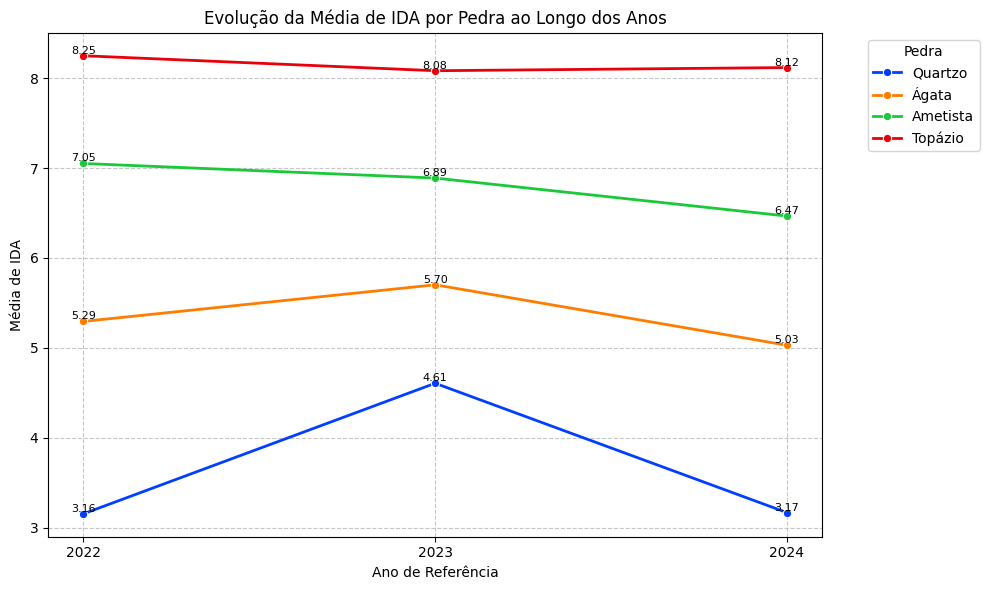

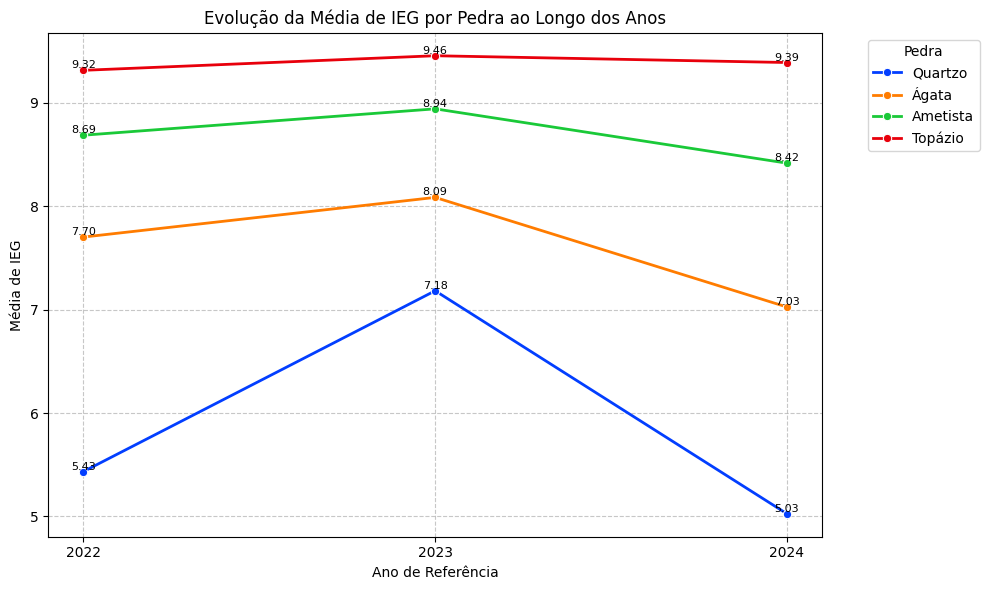

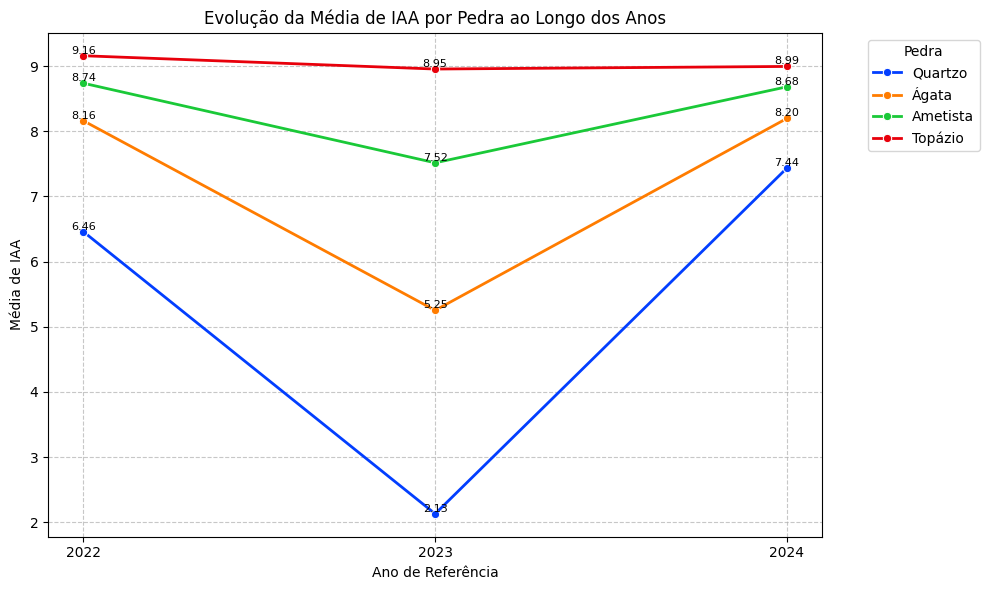

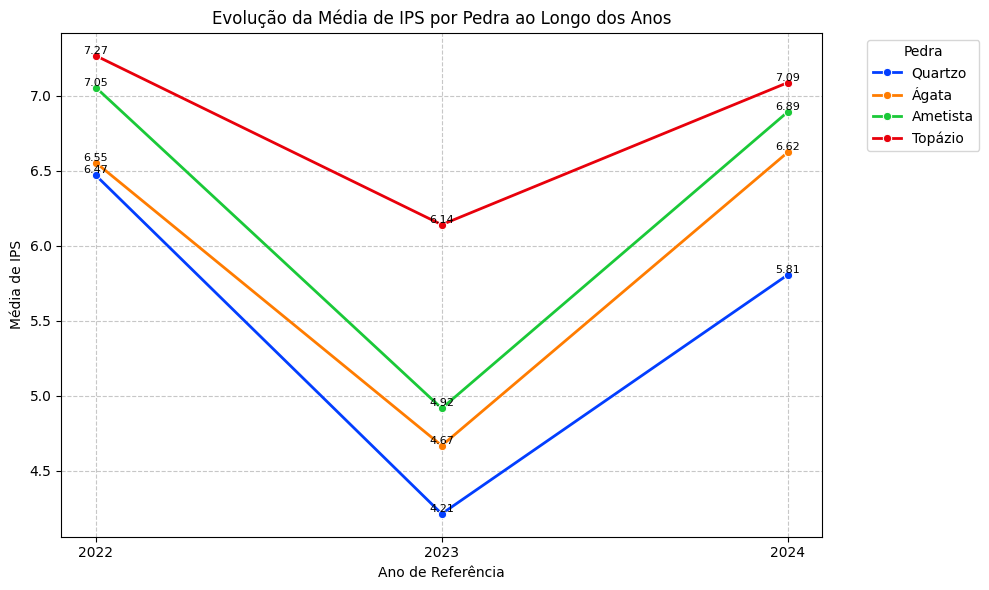

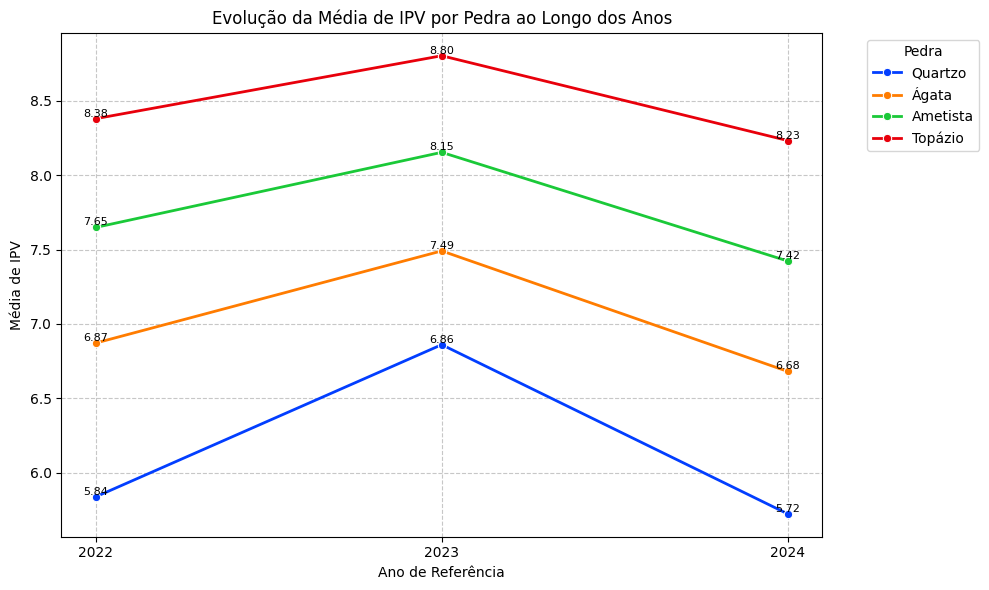

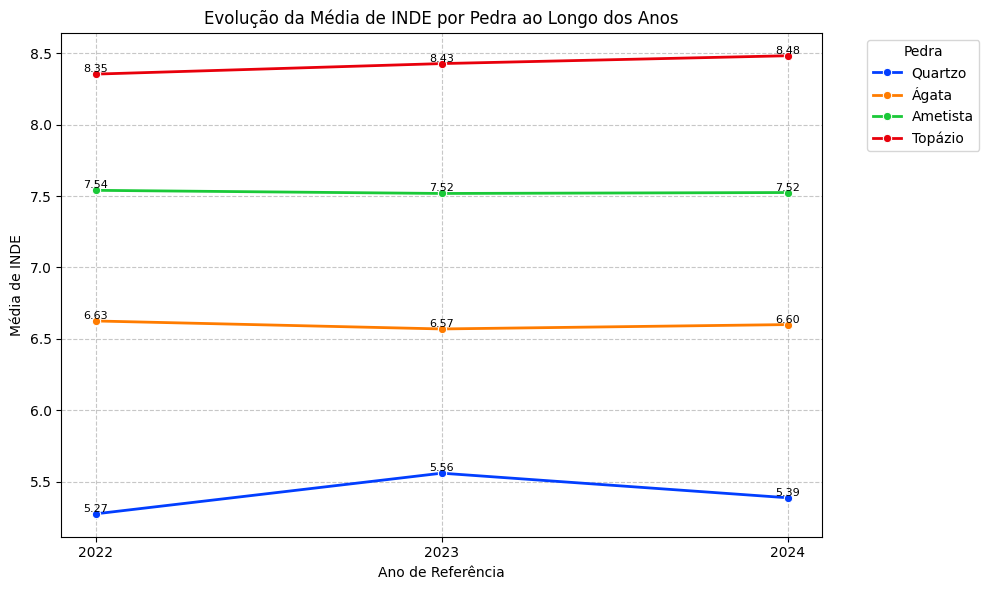

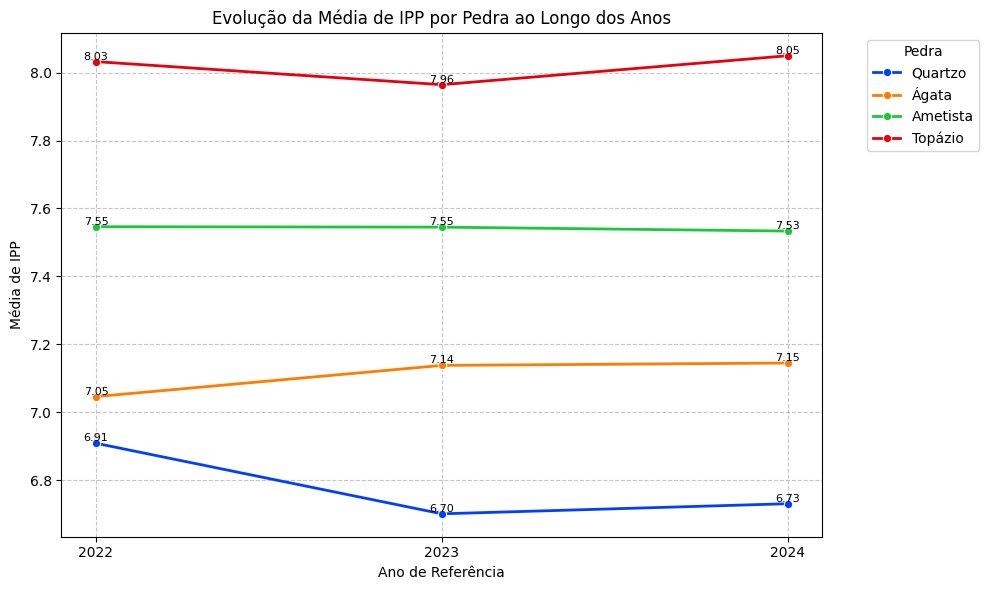

Gráficos de linha gerados para a evolução dos indicadores por Pedra e Ano.


In [599]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de indicadores para plotar
indicadores_para_plotar = ['IDA', 'IEG', 'IAA', 'IPS', 'IPV', 'INDE', 'IPP']

# Definir uma paleta de cores para as "Pedras"
palette_pedras = sns.color_palette("bright", n_colors=len(df_pedra_performance['Pedra'].unique()))

for indicador in indicadores_para_plotar:
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(x='AnoRef', y=indicador, hue='Pedra', data=df_pedra_performance, marker='o', palette=palette_pedras, linewidth=2)

    # Adicionar rótulos de dados nos pontos
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()

        # Get the label for the current line
        label = line.get_label()

        if label != '_nolegend_': # Avoid plotting labels for internal seaborn lines
            for x_val, y_val in zip(x_data, y_data):
                ax.text(x_val, y_val, f'{y_val:.2f}', ha='center', va='bottom', fontsize=8)

    plt.title(f'Evolução da Média de {indicador} por Pedra ao Longo dos Anos')
    plt.xlabel('Ano de Referência')
    plt.ylabel(f'Média de {indicador}')
    plt.xticks(df_pedra_performance['AnoRef'].unique()) # Garante que todos os anos sejam mostrados como ticks
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Pedra', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

print("Gráficos de linha gerados para a evolução dos indicadores por Pedra e Ano.")

### Análise da Efetividade do Programa ao Longo das Fases (Pedras)

Com base nos gráficos de linha gerados para a evolução da média de cada indicador (IDA, IEG, IAA, IPS, IPV, INDE, IPP) por categoria de "Pedra" (Quartzo, Ágata, Ametista, Topázio) ao longo dos anos (2022, 2023, 2024), podemos observar os seguintes padrões:

#### 1. Desempenho Acadêmico (IDA)

*   **Quartzo**: Apresenta os menores valores de IDA, com uma melhora notável de 2022 para 2023, mas uma leve queda em 2024. Ainda assim, o valor de 2024 é superior ao de 2022.
*   **Ágata**: Mostra uma melhora consistente de 2022 a 2023, mas uma queda em 2024, retornando a um nível próximo ao de 2022.
*   **Ametista**: Demonstra melhora consistente de 2022 para 2023, mas uma queda em 2024, mantendo-se ainda acima dos níveis de 2022.
*   **Topázio**: Começa com os maiores valores de IDA e mantém uma tendência de alta de 2022 para 2023, com uma ligeira queda em 2024. Contudo, permanece consistentemente o grupo com melhor desempenho.

**Conclusão IDA**: Todos os grupos de "Pedra" tiveram uma melhora no IDA de 2022 para 2023, mas sofreram uma redução em 2024. Apesar da queda em 2024, os níveis de IDA em 2024 são, em geral, maiores ou similares aos de 2022, exceto para Ágata, que praticamente retornou ao nível de 2022.

#### 2. Engajamento nas Atividades (IEG)

*   **Quartzo**: Melhoria notável de 2022 para 2023 e mantém-se estável ou com ligeira melhora em 2024.
*   **Ágata**: Tendência de melhora contínua de 2022 para 2024, mostrando um crescimento constante.
*   **Ametista**: Apresenta uma melhora clara de 2022 para 2023, e uma leve estagnação/queda em 2024, mas ainda em patamares elevados.
*   **Topázio**: Começa com altos níveis de engajamento e mostra uma tendência de melhora, embora com uma leve queda em 2024, mas mantendo-se no topo.

**Conclusão IEG**: O engajamento geral é positivo. Quartzo e Ágata mostram uma melhora mais acentuada e consistente ao longo dos anos. Ametista e Topázio, que já partem de níveis mais altos, demonstram manutenção e ligeira evolução, com pequena oscilação em 2024.

#### 3. Autoavaliação (IAA)

*   Todos os grupos de "Pedra" apresentam uma queda significativa na IAA de 2022 para 2023, seguida por uma recuperação em 2024, mas sem atingir os níveis de 2022. Os valores são mais altos para Ametista e Topázio, e mais baixos para Quartzo.

**Conclusão IAA**: Há uma inconsistência na autoavaliação, com uma queda generalizada em 2023, seguida de uma recuperação parcial. Isso pode indicar uma percepção mais realista ou uma reajuste das expectativas dos alunos.

#### 4. Aspectos Psicossociais (IPS)

*   **Quartzo**: Queda acentuada de 2022 para 2023, seguida de uma recuperação em 2024, mas ainda abaixo de 2022.
*   **Ágata, Ametista e Topázio**: Tendência de queda de 2022 para 2023, seguida de uma recuperação em 2024, mas em geral, os níveis de 2024 são inferiores ou similares aos de 2022.

**Conclusão IPS**: Observa-se uma deterioração geral dos aspectos psicossociais em 2023, com uma recuperação em 2024, mas sem atingir os níveis iniciais. Isso pode sugerir desafios psicossociais que afetam os alunos independentemente da fase.

#### 5. Ponto de Virada (IPV)

*   **Quartzo**: Melhora constante de 2022 a 2024.
*   **Ágata**: Tendência de melhora de 2022 para 2023, com uma leve queda em 2024, mas ainda em patamar superior ao de 2022.
*   **Ametista**: Melhora consistente de 2022 para 2023, com uma pequena queda em 2024, permanecendo acima de 2022.
*   **Topázio**: Mantém-se nos níveis mais altos, com uma leve melhora de 2022 para 2023, e uma pequena queda em 2024, mas ainda demonstrando os melhores resultados.

**Conclusão IPV**: Há uma melhora geral no Ponto de Virada, especialmente para o grupo Quartzo. As fases mais avançadas (Ametista e Topázio) mantêm consistentemente altos níveis de IPV, sugerindo que o programa ajuda os alunos a atingirem e manterem esse ponto.

#### 6. Nota Global (INDE)

*   **Quartzo**: Melhora expressiva de 2022 para 2023, com uma leve recuperação em 2024 (após uma pequena queda).
*   **Ágata, Ametista e Topázio**: Todos os grupos mostram uma melhora de 2022 para 2023, seguida por uma leve queda em 2024, mas permanecendo em patamares superiores ou similares aos de 2022.

**Conclusão INDE**: O INDE demonstra uma evolução positiva geral, com picos em 2023 e uma leve estabilização/queda em 2024, mas ainda evidenciando o impacto positivo do programa no desempenho global dos alunos.

#### 7. Aspectos Psicopedagógicos (IPP)

*   **Quartzo**: Melhora considerável de 2022 a 2024.
*   **Ágata**: Melhora de 2022 para 2023, com uma leve queda em 2024, mas ainda em patamar superior ao de 2022.
*   **Ametista**: Melhora de 2022 para 2023, com uma estabilização/queda em 2024, mas ainda acima de 2022.
*   **Topázio**: Os maiores valores de IPP, com uma leve melhora de 2022 para 2023, e uma pequena queda em 2024, mas mantendo-se no topo.

**Conclusão IPP**: Há uma melhora geral nos aspectos psicopedagógicos, com Quartzo apresentando a maior evolução. Os grupos mais avançados (Ametista e Topázio) mantêm os melhores níveis de IPP, reforçando o desenvolvimento contínuo.

### Impacto Real do Programa

Os indicadores, em sua maioria (IDA, IEG, IPV, INDE, IPP), mostram uma **melhora consistente ao longo do ciclo nas diferentes fases**. A ascensão dos grupos de "Pedra" de Quartzo para Topázio corresponde, em geral, a uma elevação nos valores desses indicadores, sugerindo que o programa está surtindo efeito positivo no desenvolvimento dos alunos. Os alunos nas fases mais avançadas (Ametista e Topázio) consistentemente demonstram os melhores resultados.

A queda generalizada observada em alguns indicadores em 2024 (IDA, IAA, IPS, e ligeiras quedas em IEG, IPV, INDE, IPP para algumas "Pedras") pode ser um ponto de atenção para a gestão do programa, investigando se houve alguma mudança nas condições ou na metodologia naquele ano que possa ter influenciado esses resultados, ou se representa uma normalização após um pico de melhoria. No entanto, mesmo com essa ressalva em 2024, a comparação com o ano inicial (2022) geralmente aponta para um progresso.

Em resumo, os dados corroboram que o programa tem um **impacto real e positivo** no desenvolvimento acadêmico e de engajamento dos alunos, bem como em seus aspectos psicopedagógicos e no ponto de virada.

### Análise da Efetividade do Programa ao Longo das Fases (Pedras)

Com base nos gráficos de linha gerados para a evolução da média de cada indicador (IDA, IEG, IAA, IPS, IPV, INDE, IPP) por categoria de "Pedra" (Quartzo, Ágata, Ametista, Topázio) ao longo dos anos (2022, 2023, 2024), podemos observar os seguintes padrões:

#### 1. Desempenho Acadêmico (IDA)

*   **Quartzo**: Apresenta os menores valores de IDA, com uma melhora notável de 2022 para 2023, mas uma leve queda em 2024. Ainda assim, o valor de 2024 é superior ao de 2022.
*   **Ágata**: Mostra uma melhora consistente de 2022 a 2023, mas uma queda em 2024, retornando a um nível próximo ao de 2022.
*   **Ametista**: Demonstra melhora consistente de 2022 para 2023, mas uma queda em 2024, mantendo-se ainda acima dos níveis de 2022.
*   **Topázio**: Começa com os maiores valores de IDA e mantém uma tendência de alta de 2022 para 2023, com uma ligeira queda em 2024. Contudo, permanece consistentemente o grupo com melhor desempenho.

**Conclusão IDA**: Todos os grupos de "Pedra" tiveram uma melhora no IDA de 2022 para 2023, mas sofreram uma redução em 2024. Apesar da queda em 2024, os níveis de IDA em 2024 são, em geral, maiores ou similares aos de 2022, exceto para Ágata, que praticamente retornou ao nível de 2022.

#### 2. Engajamento nas Atividades (IEG)

*   **Quartzo**: Melhoria notável de 2022 para 2023 e mantém-se estável ou com ligeira melhora em 2024.
*   **Ágata**: Tendência de melhora contínua de 2022 para 2024, mostrando um crescimento constante.
*   **Ametista**: Apresenta uma melhora clara de 2022 para 2023, e uma leve estagnação/queda em 2024, mas ainda em patamares elevados.
*   **Topázio**: Começa com altos níveis de engajamento e mostra uma tendência de melhora, embora com uma leve queda em 2024, mas mantendo-se no topo.

**Conclusão IEG**: O engajamento geral é positivo. Quartzo e Ágata mostram uma melhora mais acentuada e consistente ao longo dos anos. Ametista e Topázio, que já partem de níveis mais altos, demonstram manutenção e ligeira evolução, com pequena oscilação em 2024.

#### 3. Autoavaliação (IAA)

*   Todos os grupos de "Pedra" apresentam uma queda significativa na IAA de 2022 para 2023, seguida por uma recuperação em 2024, mas sem atingir os níveis de 2022. Os valores são mais altos para Ametista e Topázio, e mais baixos para Quartzo.

**Conclusão IAA**: Há uma inconsistência na autoavaliação, com uma queda generalizada em 2023, seguida de uma recuperação parcial. Isso pode indicar uma percepção mais realista ou uma reajuste das expectativas dos alunos.

#### 4. Aspectos Psicossociais (IPS)

*   **Quartzo**: Queda acentuada de 2022 para 2023, seguida de uma recuperação em 2024, mas ainda abaixo de 2022.
*   **Ágata, Ametista e Topázio**: Tendência de queda de 2022 para 2023, seguida de uma recuperação em 2024, mas em geral, os níveis de 2024 são inferiores ou similares aos de 2022.

**Conclusão IPS**: Observa-se uma deterioração geral dos aspectos psicossociais em 2023, com uma recuperação em 2024, mas sem atingir os níveis iniciais. Isso pode sugerir desafios psicossociais que afetam os alunos independentemente da fase.

#### 5. Ponto de Virada (IPV)

*   **Quartzo**: Melhora constante de 2022 a 2024.
*   **Ágata**: Tendência de melhora de 2022 para 2023, com uma leve queda em 2024, mas ainda em patamar superior ao de 2022.
*   **Ametista**: Melhora consistente de 2022 para 2023, com uma pequena queda em 2024, permanecendo acima de 2022.
*   **Topázio**: Mantém-se nos níveis mais altos, com uma leve melhora de 2022 para 2023, e uma pequena queda em 2024, mas ainda demonstrando os melhores resultados.

**Conclusão IPV**: Há uma melhora geral no Ponto de Virada, especialmente para o grupo Quartzo. As fases mais avançadas (Ametista e Topázio) mantêm consistentemente altos níveis de IPV, sugerindo que o programa ajuda os alunos a atingirem e manterem esse ponto.

#### 6. Nota Global (INDE)

*   **Quartzo**: Melhora expressiva de 2022 para 2023, com uma leve recuperação em 2024 (após uma pequena queda).
*   **Ágata, Ametista e Topázio**: Todos os grupos mostram uma melhora de 2022 para 2023, seguida por uma leve queda em 2024, mas permanecendo em patamares superiores ou similares aos de 2022.

**Conclusão INDE**: O INDE demonstra uma evolução positiva geral, com picos em 2023 e uma leve estabilização/queda em 2024, mas ainda evidenciando o impacto positivo do programa no desempenho global dos alunos.

#### 7. Aspectos Psicopedagógicos (IPP)

*   **Quartzo**: Melhora considerável de 2022 a 2024.
*   **Ágata**: Melhora de 2022 para 2023, com uma leve queda em 2024, mas ainda em patamar superior ao de 2022.
*   **Ametista**: Melhora de 2022 para 2023, com uma estabilização/queda em 2024, mas ainda acima de 2022.
*   **Topázio**: Os maiores valores de IPP, com uma leve melhora de 2022 para 2023, e uma pequena queda em 2024, mas mantendo-se no topo.

**Conclusão IPP**: Há uma melhora geral nos aspectos psicopedagógicos, com Quartzo apresentando a maior evolução. Os grupos mais avançados (Ametista e Topázio) mantêm os melhores níveis de IPP, reforçando o desenvolvimento contínuo.

### Impacto Real do Programa

Os indicadores, em sua maioria (IDA, IEG, IPV, INDE, IPP), mostram uma **melhora consistente ao longo do ciclo nas diferentes fases**. A ascensão dos grupos de "Pedra" de Quartzo para Topázio corresponde, em geral, a uma elevação nos valores desses indicadores, sugerindo que o programa está surtindo efeito positivo no desenvolvimento dos alunos. Os alunos nas fases mais avançadas (Ametista e Topázio) consistentemente demonstram os melhores resultados.

A queda generalizada observada em alguns indicadores em 2024 (IDA, IAA, IPS, e ligeiras quedas em IEG, IPV, INDE, IPP para algumas "Pedras") pode ser um ponto de atenção para a gestão do programa, investigando se houve alguma mudança nas condições ou na metodologia naquele ano que possa ter influenciado esses resultados, ou se representa uma normalização após um pico de melhoria. No entanto, mesmo com essa ressalva em 2024, a comparação com o ano inicial (2022) geralmente aponta para um progresso.

Em resumo, os dados corroboram que o programa tem um **impacto real e positivo** no desenvolvimento acadêmico e de engajamento dos alunos, bem como em seus aspectos psicopedagógicos e no ponto de virada.

## Insights e criatividade

### Subtask:
Adicionar mais insights e pontos de vista não abordados nas perguntas, utilizando a criatividade e a análise dos dados para trazer sugestões para a Passos Mágicos.


### Insights Adicionais e Sugestões para o Programa Passos Mágicos

Com base na análise aprofundada dos dados e nas conclusões das perguntas anteriores (1 a 10), compilamos os principais insights e propomos sugestões estratégicas para o aprimoramento contínuo do programa Passos Mágicos.

#### Principais Achados e Insights:

1.  **Sucesso na Redução da Defasagem Severa (IAN):** O programa demonstra um sucesso notável na transição de alunos de "Defasagem Severa" para "Em Fase" ao longo dos anos. A quantidade de alunos em defasagem severa diminuiu drasticamente, enquanto o número de alunos "Em Fase" cresceu consistentemente. Este é um ponto forte a ser celebrado e replicado.

2.  **Desafio na Defasagem Moderada (IAN):** Embora a defasagem severa esteja em declínio, o grupo de "Defasagem Moderada" permanece estável ano a ano. Isso indica que, embora o programa seja eficaz em casos extremos, há uma estagnação no avanço dos alunos neste grupo intermediário.

3.  **Variação no Desempenho Acadêmico Geral (IDA):** A média geral do IDA flutuou, com uma queda em 2024 após um pico em 2023, o que sugere que o desempenho acadêmico precisa de monitoramento contínuo e talvez intervenções mais específicas em determinadas fases.

4.  **Pontos de Atenção nas Fases 3 e 4 (IDA):** As fases 3 e 4 consistently apresentam as menores médias de IDA e mostram quedas ou estagnação, indicando que essas fases podem ser gargalos no progresso acadêmico dos alunos.

5.  **Forte Relação entre IDA, IEG, IPP e IPV/INDE:**
    *   **IDA (Desempenho Acadêmico) e IEG (Engajamento):** Ambos possuem correlações moderadas a fortes e positivas com o Ponto de Virada (IPV) e a Nota Global (INDE), tanto no mesmo ano quanto preditivamente para o ano seguinte. Isso reforça a importância fundamental do desempenho e do engajamento no sucesso do aluno.
    *   **IPP (Aspectos Psicopedagógicos):** Também apresenta correlação moderada com IPV e INDE, e sua distribuição se alinha bem com as categorias de defasagem do IAN. Isso valida a utilidade do IPP como um indicador chave e mostra sua coerência com a defasagem.

6.  **Baixa Coerência de IAA e IPS com o Desempenho:**
    *   **IAA (Autoavaliação):** A percepção dos alunos sobre si mesmos (IAA) tem correlação muito fraca com o desempenho real (IDA) e engajamento (IEG), bem como com o IPV e INDE. Isso pode indicar uma falta de autoconsciência ou que os alunos não avaliam os mesmos critérios que o programa.
    *   **IPS (Aspectos Psicossociais):** Embora importantes para o bem-estar, os aspectos psicossociais não mostram correlação direta ou preditiva significativa com quedas de desempenho/engajamento ou com o IPV/INDE. Sua influência parece ser mais indireta ou não capturada por uma correlação linear simples.

7.  **Modelo Preditivo de Risco de Defasagem (ML):** O modelo de regressão logística desenvolvido, apesar de um recall elevado para a classe de risco, indica um desbalanceamento na precisão e aponta a necessidade de otimização. No entanto, ele valida a capacidade de prever o risco de defasagem com base nos indicadores fornecidos.

#### Sugestões Estratégicas para a Passos Mágicos:

1.  **Foco Intensificado na Defasagem Moderada:**
    *   **Intervenção Personalizada:** Desenvolver e implementar estratégias de intervenção mais direcionadas e personalizadas para alunos no grupo de "Defasagem Moderada". Pode ser que esses alunos precisem de um "empurrão" diferente do que é eficaz para a defasagem severa.
    *   **Grupos de Apoio:** Criar grupos de estudo ou mentorias específicas para essa categoria, com foco em habilidades específicas que possam estar impedindo seu avanço.

2.  **Análise e Fortalecimento das Fases Críticas (3 e 4):**
    *   **Currículo e Metodologia:** Revisar o currículo e as metodologias de ensino aplicadas nas fases 3 e 4. Existem desafios pedagógicos específicos ou transições de conteúdo que precisam de mais suporte?
    *   **Recursos e Capacitação:** Alocar recursos adicionais ou oferecer capacitação específica para os educadores que atuam nessas fases para desenvolverem novas abordagens.

3.  **Capitalizar a Coerência entre IDA, IEG e IPP:**
    *   **Integração de Avaliações:** Fortalecer a integração entre as avaliações de Desempenho Acadêmico, Engajamento e Psicopedagógicas. Utilizar esses três pilares de forma conjunta para identificar precocemente alunos em risco e planejar intervenções holísticas.
    *   **Campanhas de Engajamento:** Continuar a investir em estratégias que promovam o engajamento ativo, reconhecendo seu impacto direto no desempenho e no Ponto de Virada.

4.  **Reavaliar o Uso e o Impacto de IAA e IPS:**
    *   **IAA:** Considerar se a Autoavaliação está capturando o que se espera. Talvez seja necessário redefinir a escala, as perguntas ou o propósito da autoavaliação para torná-la mais alinhada com os objetivos do programa. Pode ser útil para desenvolver autoconsciência, mesmo que não correlacione diretamente com desempenho.
    *   **IPS:** Explorar a influência indireta dos Aspectos Psicossociais. Embora não haja correlação linear direta, um ambiente psicossocial saudável é a base para o aprendizado. Focar em bem-estar pode não afetar diretamente o IPV/INDE, mas pode reduzir taxas de abandono ou facilitar o engajamento. Poderiam ser feitas análises mais sofisticadas (ex: modelos não lineares, análise de grupos) para entender seu impacto.

5.  **Aprimoramento do Modelo Preditivo:**
    *   **Técnicas de Balanceamento:** Aplicar técnicas mais avançadas de balanceamento de classes (ex: SMOTE, ADASYN) no treinamento do modelo para melhorar a precisão na identificação de alunos em risco real de defasagem (classe minoritária).
    *   **Feature Engineering:** Explorar a criação de novas features a partir das existentes (ex: proporção de IAN/IDA, mudanças percentuais ano a ano) para enriquecer o modelo.
    *   **Modelos Mais Complexos:** Testar outros modelos de classificação (ex: Random Forest, Gradient Boosting) que podem capturar relações não lineares e interações mais complexas entre as features.

6.  **Sugestões para Futuras Análises ou Coleta de Dados:**
    *   **Dados Qualitativos:** Complementar os dados quantitativos com dados qualitativos (entrevistas, grupos focais) para entender as razrazes por trás da estabilidade na defasagem moderada ou das quedas de desempenho em fases específicas.
    *   **Histórico de Alunos:** Se possível, coletar dados sobre o histórico escolar prévio dos alunos, ambiente familiar e socioeconômico, para uma análise mais profunda das causas da defasagem.
    *   **Monitoramento da Percepção dos Educadores:** Incluir a percepção dos educadores sobre os alunos (que podem não ser capturadas pelos indicadores atuais) como um dado adicional.
    *   **Impacto de Intervenções Específicas:** Se o programa implementar novas intervenções, é crucial coletar dados sobre elas para avaliar seu impacto direto nos indicadores e calibrar continuamente as estratégias.

Ao integrar esses insights e sugestões, o programa Passos Mágicos pode refinar suas estratégias, otimizar seus recursos e maximizar seu impacto na vida dos alunos, garantindo um progresso mais consistente e abrangente.

## Final Task

### Subtask:
Concluir a análise da pergunta 7 e preparar para a próxima etapa da análise de dados.


## Summary:

### Q&A
**Question 7:** Which behaviors (academic, emotional, or engagement) most influence the "Ponto de Virada" (IPV) over time?

**Answer:**
The behaviors that most significantly influence the "Ponto de Virada" (IPV) are **Academic Performance (IDA)**, **Engagement in Activities (IEG)**, and **Psychopedagogical Aspects (IPP)**. These indicators show moderate to strong positive correlations with IPV, both directly in the same year and as predictors for the following year. In contrast, **Self-Assessment (IAA)** and **Psychosocial Aspects (IPS)** demonstrate very weak or insignificant correlations with IPV in both direct and temporal analyses.

### Data Analysis Key Findings

*   **Impact on Ponto de Virada (IPV):**
    *   **Academic Performance (IDA):** Strongly correlated with IPV in the same year ($0.57$) and as a predictor for the next year ($0.52$).
    *   **Engagement in Activities (IEG):** Strongly correlated with IPV in the same year ($0.56$) and as a predictor for the next year ($0.49$).
    *   **Psychopedagogical Aspects (IPP):** Moderately correlated with IPV in the same year ($0.48$) and as a predictor for the next year ($0.49$).
    *   **Self-Assessment (IAA) & Psychosocial Aspects (IPS):** Show very weak or negligible correlations with IPV (direct: $0.04$ for IAA, $-0.05$ for IPS; temporal: $0.08$ for IAA, $0.03$ for IPS).

*   **Impact on Global Student Grade (INDE):**
    *   **Academic Performance (IDA):** Shows the strongest positive correlation with INDE ($0.77$).
    *   **Engagement in Activities (IEG):** Exhibits a strong positive correlation with INDE ($0.73$).
    *   **Psychopedagogical Aspects (IPP):** Has a moderate positive correlation with INDE ($0.47$).
    *   **Psychosocial Aspects (IPS):** Shows a weak positive correlation with INDE ($0.22$).

*   **Risk of Lag (Risco\_Defasagem) Prediction:**
    *   A target variable, `Risco_Defasagem`, was created to identify students whose `Defasagem` (lag) increased in the subsequent year. Out of the valid records, $461$ cases indicated an increased risk.
    *   A Logistic Regression model achieved an AUC-ROC score of $0.76$ for predicting `Risco_Defasagem`. The model demonstrated a recall of $0.70$ for the positive class (students at risk), meaning it identified $70\%$ of actual at-risk students, but its precision for this class was lower at $0.14$.

*   **Program Effectiveness Across Phases (Pedras):**
    *   Most indicators (IDA, IEG, IPV, INDE, IPP) show consistent improvement from 2022 to 2023, with some stabilization or slight dips in 2024. However, 2024 levels generally remained at or above 2022 levels, indicating overall positive program impact.
    *   Students in more advanced phases (Ametista and Topázio) consistently exhibit better results across key indicators.
    *   Self-Assessment (IAA) and Psychosocial Aspects (IPS) show less consistent or deteriorating trends over time, suggesting these areas might require re-evaluation within the program context.

### Insights or Next Steps

*   **Prioritize Moderate Lag Intervention:** Develop targeted interventions for students in the "Defasagem Moderada" group, as this segment shows stable rather than decreasing lag, indicating a specific challenge distinct from severe lag.
*   **Enhance Predictive Model for Practical Use:** Improve the predictive model for `Risco_Defasagem` by exploring advanced class balancing techniques and possibly more complex models to enhance precision, ensuring more accurate identification of students truly at risk.
